# $1.$ Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import time
warnings.filterwarnings("ignore")

# $2.$ Скачивание данных

In [2]:
df_economy = pd.read_csv('economy.csv', encoding='utf-8')
df_business = pd.read_csv('business.csv', encoding='utf-8')
df_clean = pd.read_csv('Clean_Dataset.csv', encoding='utf-8')
df_clean = df_clean.drop(['Unnamed: 0'], axis = 1)
df_economy = df_economy.replace({r'\n': ' ', r'\t': ' '}, regex=True)
df_business = df_business.replace({r'\n': ' ', r'\t': ' '}, regex=True)
df_clean = df_clean.replace({r'\n': ' ', r'\t': ' '}, regex=True)

In [ ]:
df_economy.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [ ]:
df_economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [ ]:
df_business.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,"46,690"


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df_clean.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# $3.$ Описание датасета

## 3.1 Набор данных о бронировании рейсов

Набор данных содержит информацию о вариантах бронирования рейсов с веб-сайта Easemytrip для перелетов между 6 лучшими городами Индии. В очищенном наборе данных имеется 300,261 точка данных и 11 функций.



## 3.2 Характеристики данных

1. **Авиакомпания** (`airline`):  
   Название авиакомпании, которая выполняет рейс. Это категорическая функция, которая имеет 6 различных авиакомпаний.

2. **Рейс** (`Flight`):  
   Код рейса самолета. Это категорическая переменная.

3. **Город отправления** (`Source_city`):  
   Город, из которого вылетает рейс. Это категорическая функция, которая имеет 6 уникальных городов.

4. **Время отправления** (`Departure_time`):  
   Время отправления рейса, сгруппированное в 6 временных интервалов. Это производная категорическая функция.

5. **Остановки** (`Stops`):  
   Количество остановок на пути между городами отправления и назначения. Это категориальная переменная с 3 возможными значениями.

6. **Время прибытия** (`Arrival_time`):  
   Время прибытия рейса, сгруппированное в 6 временных интервалов. Это производная категорическая функция.

7. **Город назначения** (`Destination_city`):  
   Город, в который прибывает рейс. Это категорическая переменная с 6 уникальными городами.

8. **Класс** (`Class`):  
   Класс места на рейсе (эконом или бизнес). Это категорическая переменная с двумя значениями.

9. **Продолжительность** (`Duration`):  
   Время в пути между городами в часах. Это непрерывная переменная.

10. **Дни до вылета** (`Days_left`):  
    Разница в днях между датой бронирования и датой вылета. Это производная характеристика.

11. **Цена** (`price`):  
    Целевая переменная, которая содержит информацию о стоимости билета.


# $4.$ EDA

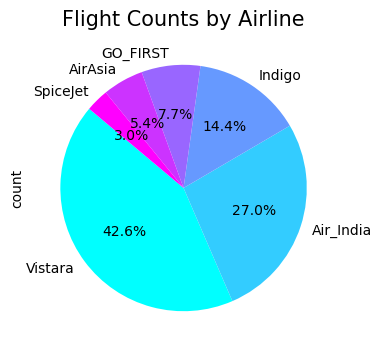

In [ ]:
airline_counts=df_clean.airline.value_counts()

plt.figure(figsize=(4, 4))
df_clean.airline.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140 , cmap='cool')

plt.title('Flight Counts by Airline', fontsize=15)
plt.show()

На этом изображении представлена круговая диаграмма под названием "Flight Counts by Airline" (Количество рейсов по авиакомпаниям). Диаграмма показывает процентное распределение рейсов между различными авиакомпаниями: Vistara (42.6%), Air_India (27.0%), Indigo (14.4%), GO_FIRST (7.7%), AirAsia (5.4%) и Spicejet (3.0%). Vistara выполняет наибольшее количество рейсов, за ней следуют Air_India и Indigo.%

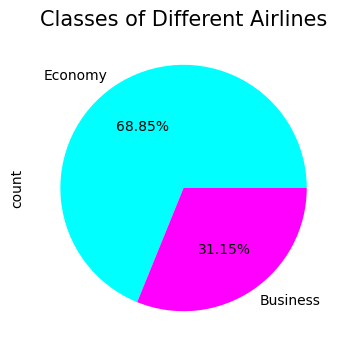

In [ ]:
plt.figure(figsize=(4,4))
df_clean['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f%%',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.show()

Это изображение представляет собой круговую диаграмму под названием "Classes of Different Airlines" (Классы различных авиакомпаний). Диаграмма иллюстрирует процентное соотношение двух классов обслуживания: "Economy" (Эконом) и "Business" (Бизнес). На эконом-класс приходится 68.85% от общего числа, в то время как на бизнес-класс приходится 31.15%.

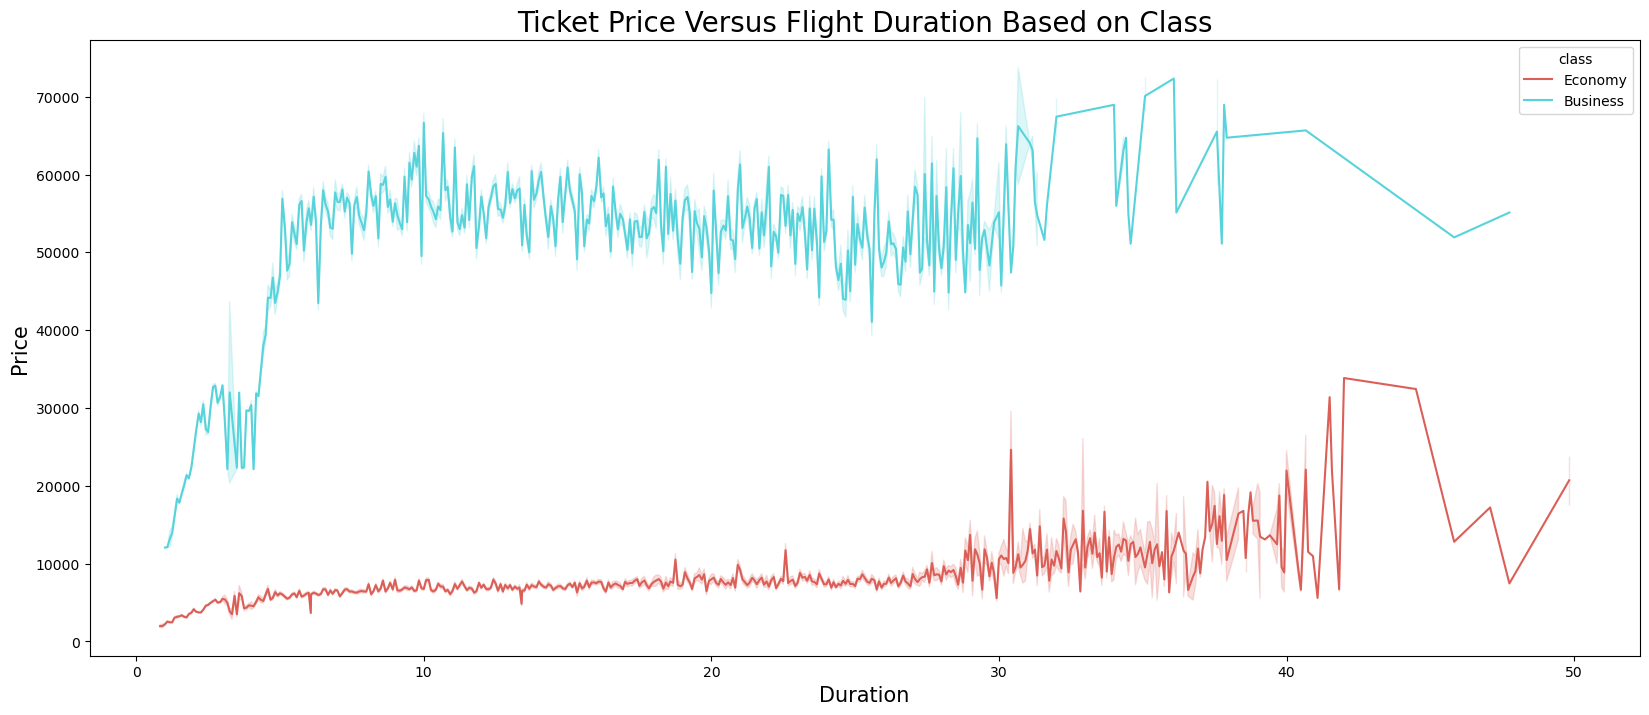

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_clean,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

На этом изображении показан линейный график с названием "Ticket Price Versus Flight Duration Based on Class" (Цена билета в зависимости от продолжительности полета по классам). На оси X отложена продолжительность полета ('Duration'), а на оси Y – цена ('Price'). В целом, цены на билеты бизнес-класса выше, чем на билеты эконом-класса, обе линии показывают тенденцию к увеличению цены с увеличением продолжительности полета, особенно это заметно для бизнес-класса.

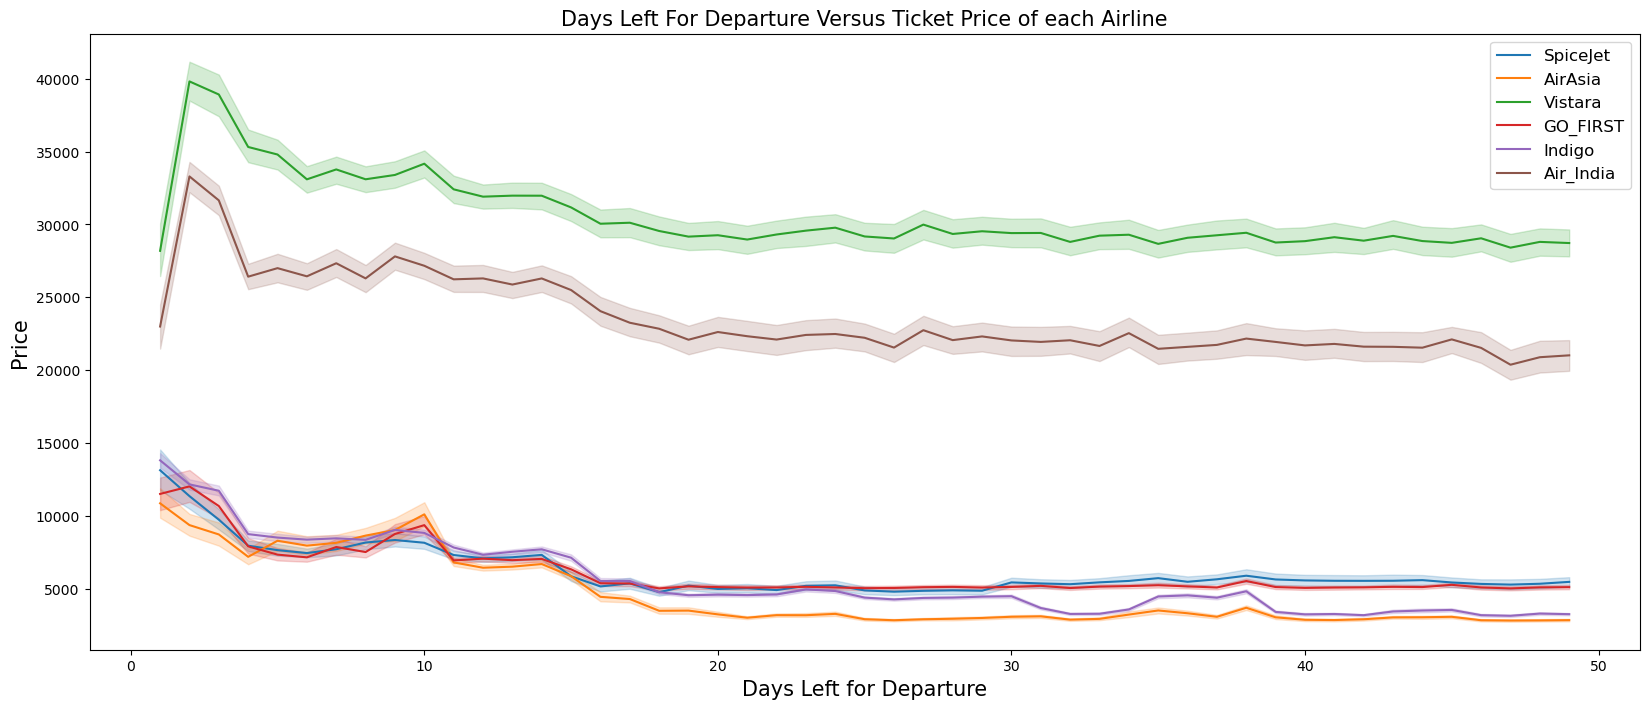

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_clean,x='days_left',y='price',color='blue',hue='airline')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

График показывает зависимость цен авиабилетов от дней до вылета для шести авиакомпаний. Vistara и Air_India значительно дороже остальных, чьи цены ниже и более схожи. В основном, билеты дешевеют ближе к дате вылета, но могут дорожать непосредственно перед ним.

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_clean['airline'] = label_encoder.fit_transform(df_clean['airline'])
df_clean['flight'] = label_encoder.fit_transform(df_clean['flight'])
df_clean['source_city'] = label_encoder.fit_transform(df_clean['source_city'])
df_clean['departure_time'] = label_encoder.fit_transform(df_clean['departure_time'])
df_clean['arrival_time'] = label_encoder.fit_transform(df_clean['arrival_time'])
df_clean['destination_city'] = label_encoder.fit_transform(df_clean['destination_city'])
df_clean['class'] = label_encoder.fit_transform(df_clean['class'])
df_clean['stops'] = label_encoder.fit_transform(df_clean['stops'])

In [ ]:
df_clean.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


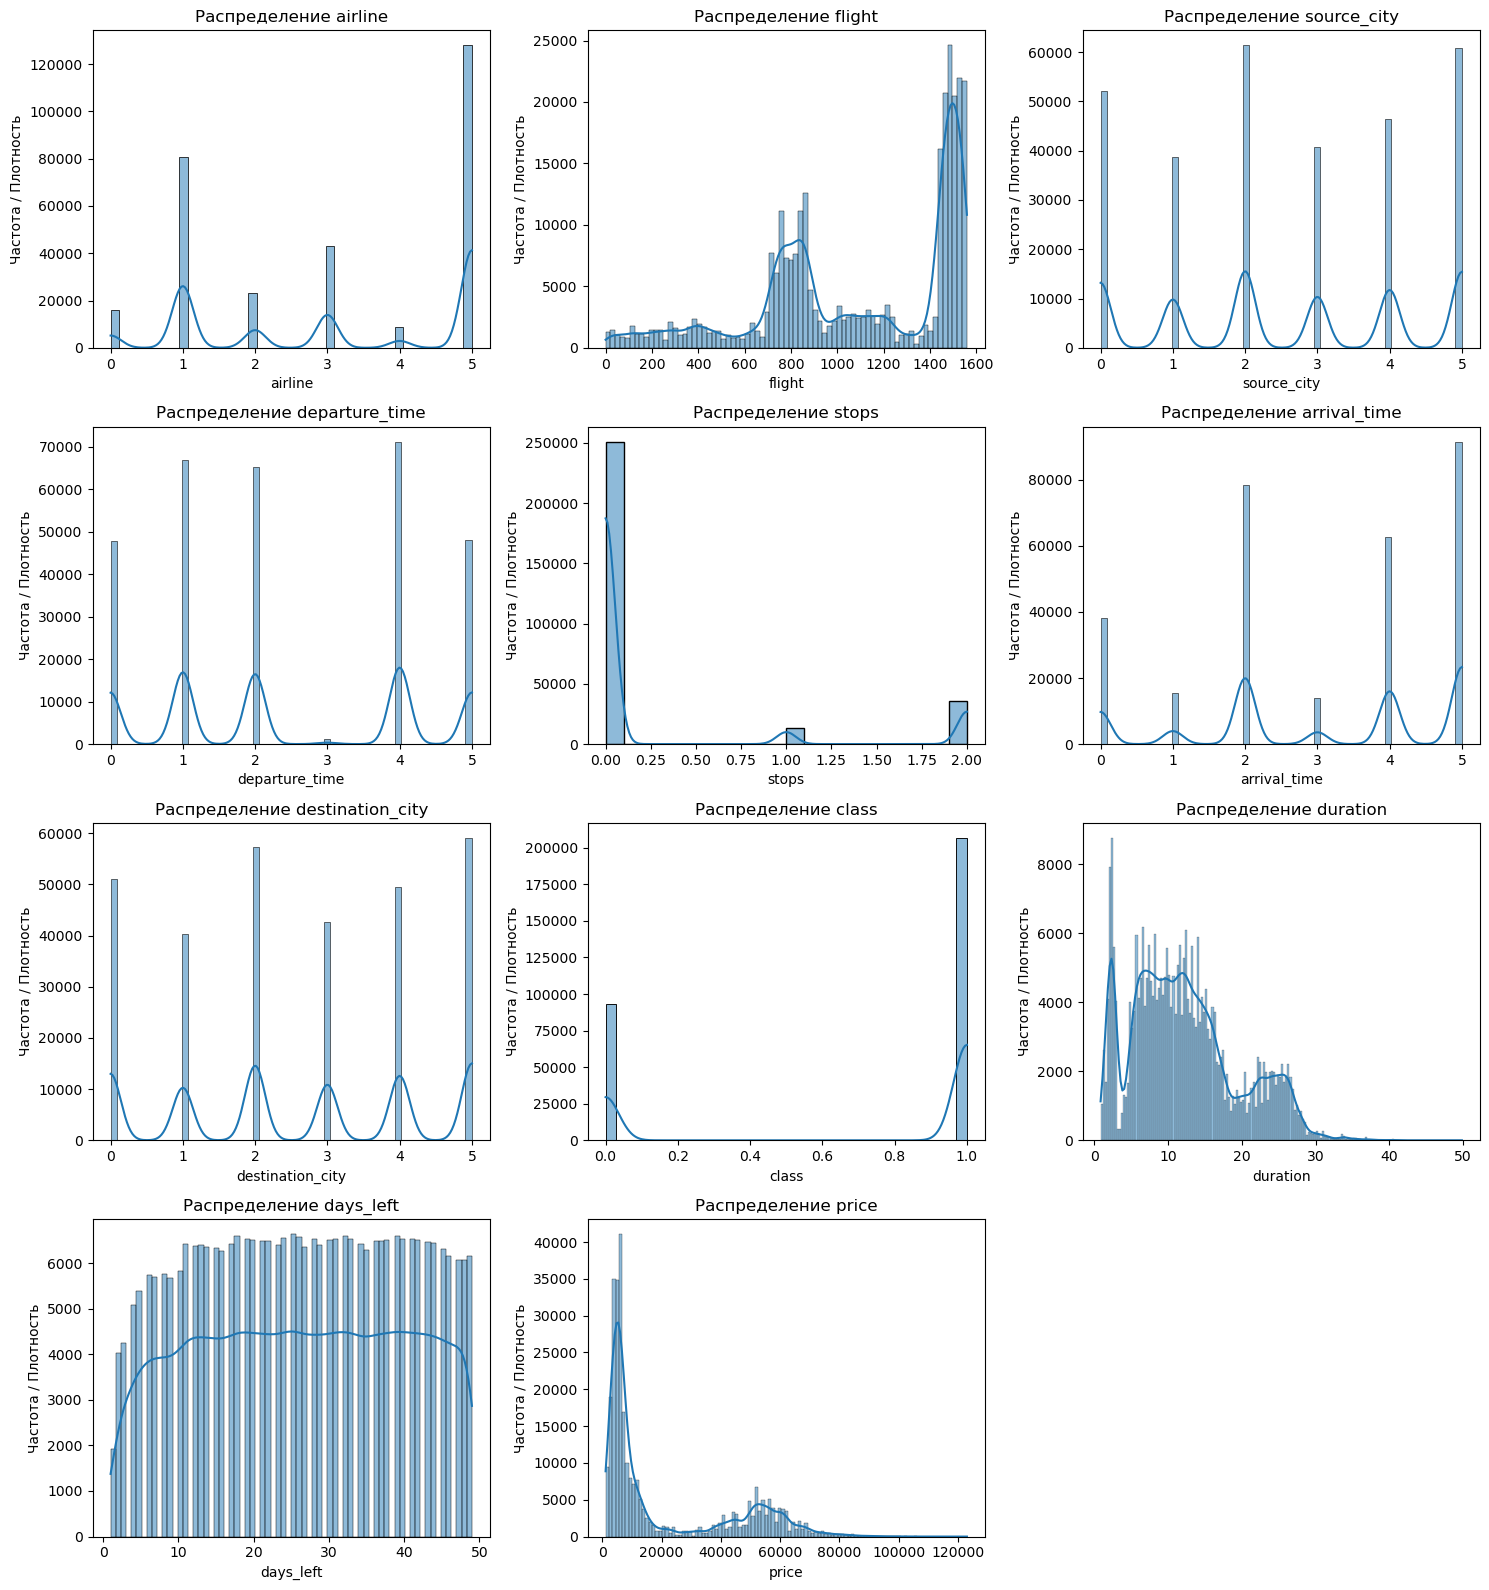

In [ ]:
numerical_cols = df_clean.select_dtypes(include=['number']).columns


num_cols = len(numerical_cols)

n_cols_grid = 3
n_rows_grid = (num_cols - 1) // n_cols_grid + 1

fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(n_cols_grid * 5, n_rows_grid * 4))
axes = axes.flatten()

for i, col_name in enumerate(numerical_cols):
    sns.histplot(df_clean[col_name], kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение {col_name}')
    axes[i].set_xlabel(col_name)
    axes[i].set_ylabel('Частота / Плотность')

# Скрываем лишние пустые графики, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- Flight (рейс): Частота идентификаторов рейсов (0-1600) неравномерна, с выраженными пиками, указывая на популярные группы рейсов (особенно около 1400-1500).
- Stops (количество пересадок): Подавляющее большинство рейсов — прямые (0.00), затем по частоте идут рейсы с двумя пересадками.
- Class (класс обслуживания): Эконом класс абсолютно доминирует по количеству над бизнес классом.
- Duration (продолжительность полета): Большинство перелетов короткие (пик 5-15 единиц), и частота быстро падает для более длительных рейсов.
- Days_left (дней до вылета): Билеты покупаются в разное время (0-50 дней), но с пиком активности за 5-15 дней до вылета.
- Price (цена): Большинство билетов имеют низкую цену (пик до 20000), а дорогие билеты встречаются значительно реже.

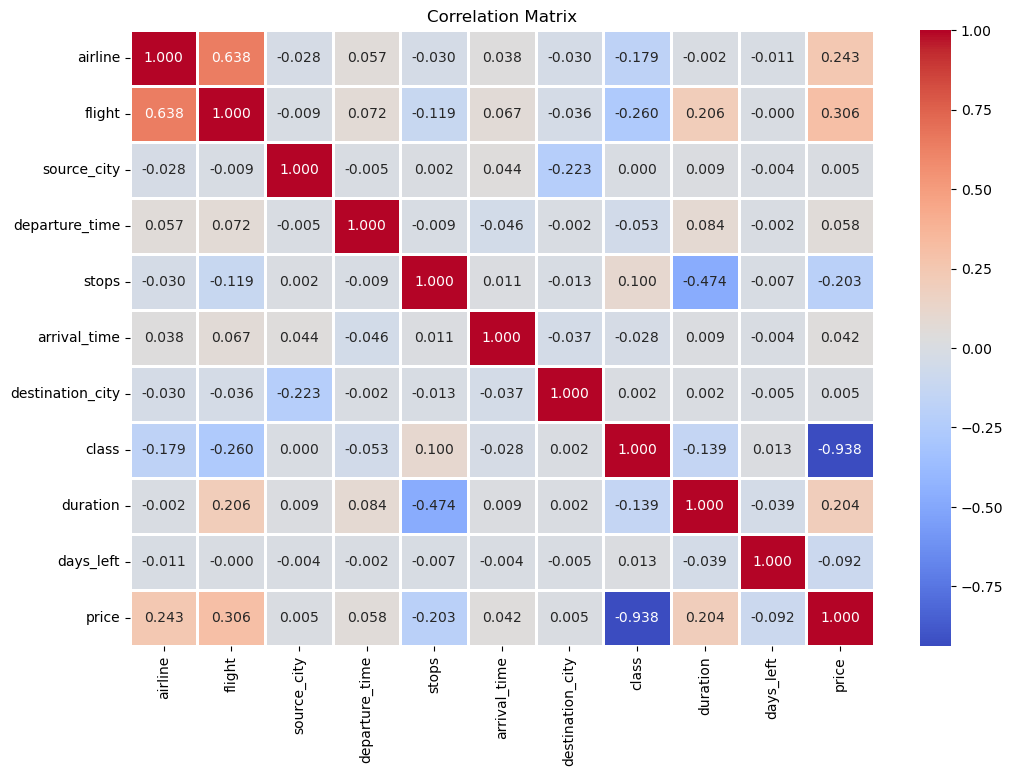

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt='.3f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

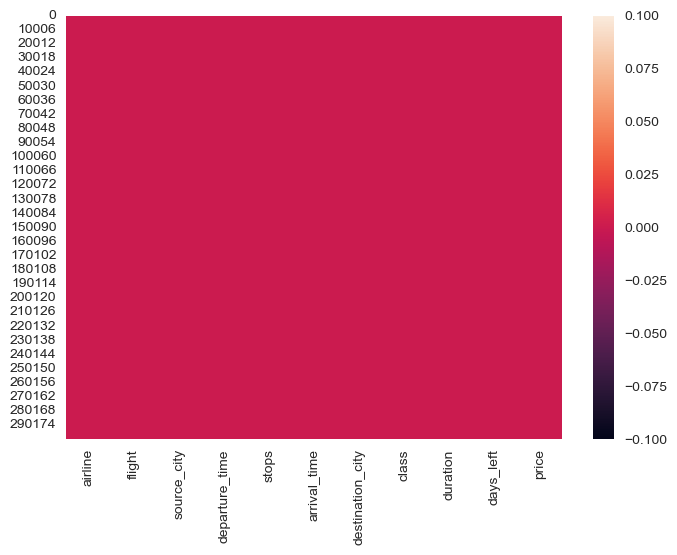

In [ ]:
sns.heatmap(df_clean.isnull())
plt.show() # пропущенных значений нет

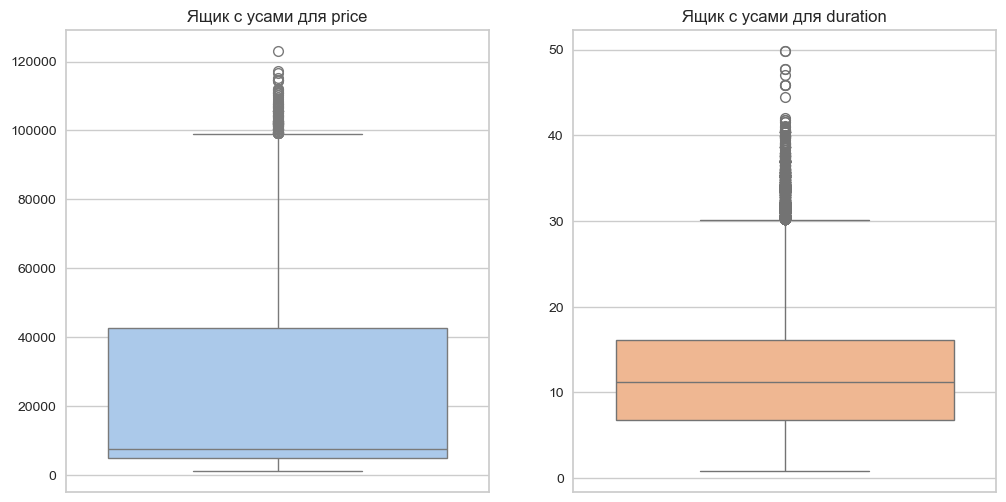

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=df_clean.price, ax = ax[0], color=sns.color_palette("pastel")[0])
ax[0].set_title(f'Ящик с усами для price', fontsize=12)
ax[0].set_ylabel('')

sns.boxplot(y=df_clean.duration, ax = ax[1], color=sns.color_palette("pastel")[1])
ax[1].set_title(f'Ящик с усами для duration', fontsize=12)
ax[1].set_ylabel('')
plt.show()

- Ящик с усами для price (цена):

Основная часть цен (межквартильный размах, "ящик") сосредоточена в нижнем диапазоне, примерно от очень низких значений до около 40 000 - 45 000. Медианная цена (линия внутри ящика) находится на относительно низком уровне, ориентировочно в районе 5 000 - 10 000.
Наблюдается большое количество выбросов (отдельные точки над "верхним усом"), которые показывают наличие значительно более высоких цен, достигающих примерно 120 000. Это указывает на то, что распределение цен сильно смещено вправо (положительная асимметрия).

- Ящик с усами для duration (длительность):

Распределение длительности также показывает, что основная масса значений (межквартильный размах) находится в относительно узком диапазоне, примерно от 5-7 до 15-17 единиц. Медианная длительность составляет около 10-12 единиц.
Присутствует множество выбросов в сторону больших значений длительности, доходящих примерно до 50. Это также свидетельствует о правосторонней асимметрии распределения.

`Касательно выбросов`: Важно понимать, что эти точки, отмеченные как выбросы, также являются частью данных. Несмотря на то, что они находятся на удалении от основной массы значений, они представляют реальные наблюдения и несут в себе информацию. Поэтому их не следует автоматически удалять. Выбросы указывают на особые случаи, редкие события.

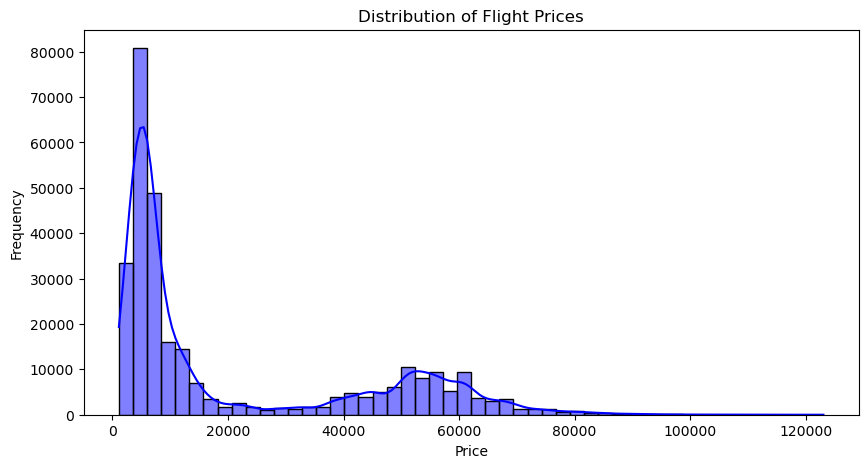

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Цены на билеты сильно скошены вправо — большинство билетов дешевые, но есть и дорогие. Распределение мультимодальное, то есть видны несколько пиков, указывающих на разные группы цен.

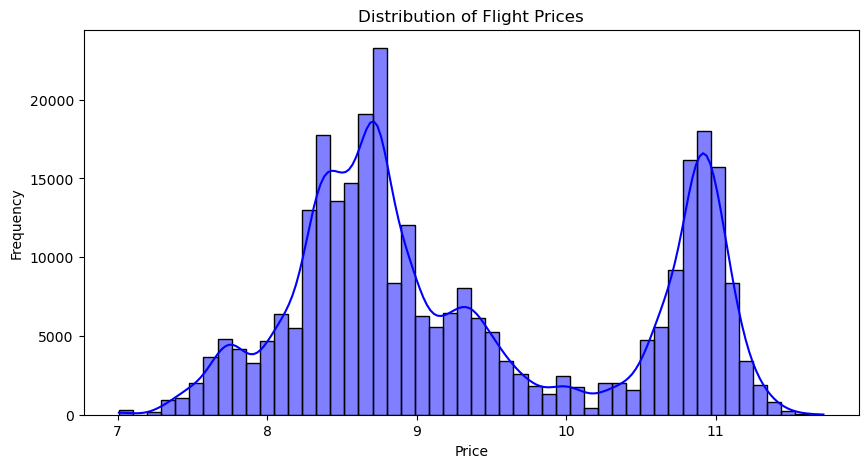

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(np.log(df_clean['price']), bins=50, kde=True, color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Мы не логарифмируем распределение цен. Хотя такой подход был протестирован, он не привел к улучшению качества моделей.

# $5.$ BASELINE MODEL

In [7]:
from sklearn.model_selection import train_test_split, learning_curve
X = df_clean.drop(['price'], axis = 1)
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, max_error, median_absolute_error, mean_squared_log_error
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
answer_baseline = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE', 'MAPE', 'Max Error', 'Median Absolute Error', 'fit_time'])

## 5.1 среднее значение

In [ ]:
start_time = time.time()
y_pred = np.full_like(y_test, np.mean(y_train))
end_time = time.time()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

answer_baseline_coss = pd.DataFrame({
    'Model': ["Среднее_значение"],
    'MSE': [mse],
    'MAE': [mae],
    'R2': [r2],
    'RMSE': [rmse],
    'MAPE': [mape],
    'Max Error': [max_err],
    'Median Absolute Error': [medae],
    'fit_time': [end_time - start_time]
})

answer_baseline = pd.concat([answer_baseline, answer_baseline_coss], ignore_index=True)

In [ ]:
answer_baseline_coss

,Model,MSE,MAE,R2,RMSE,MAPE,Max Error,Median Absolute Error,fit_time
0,Среднее_значение,5.158205e+08,19783.880712,-7.249170e-08,22711.682233,2.385209,102179,16391.0,0.000644


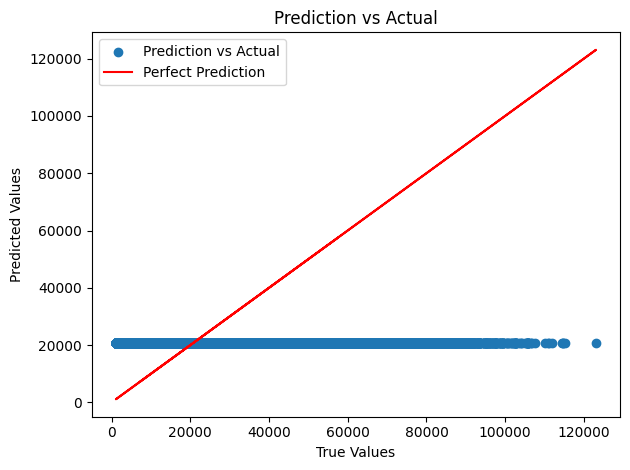

In [ ]:
plt.scatter(y_test, y_pred, label="Prediction vs Actual")
plt.plot(y_test, y_test, c='r', label="Perfect Prediction")
plt.title('Prediction vs Actual')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

## 5.2 Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

start_time = time.time()
lin_model.fit(X_train, y_train)
end_time = time.time()

y_pred = lin_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

answer_baseline_coss = pd.DataFrame({
    'Model': ["LinearRegression"],
    'MSE': [mse],
    'MAE': [mae],
    'R2': [r2],
    'RMSE': [rmse],
    'MAPE': [mape],
    'Max Error': [max_err],
    'Median Absolute Error': [medae],
    'fit_time': [end_time - start_time]
})
answer_baseline = pd.concat([answer_baseline, answer_baseline_coss], ignore_index=True)
answer_baseline_coss

,Model,MSE,MAE,R2,RMSE,MAPE,Max Error,Median Absolute Error,fit_time
0,LinearRegression,4.907435e+07,4633.135491,0.904862,7005.308491,0.437406,65098.313719,2990.236275,0.205945


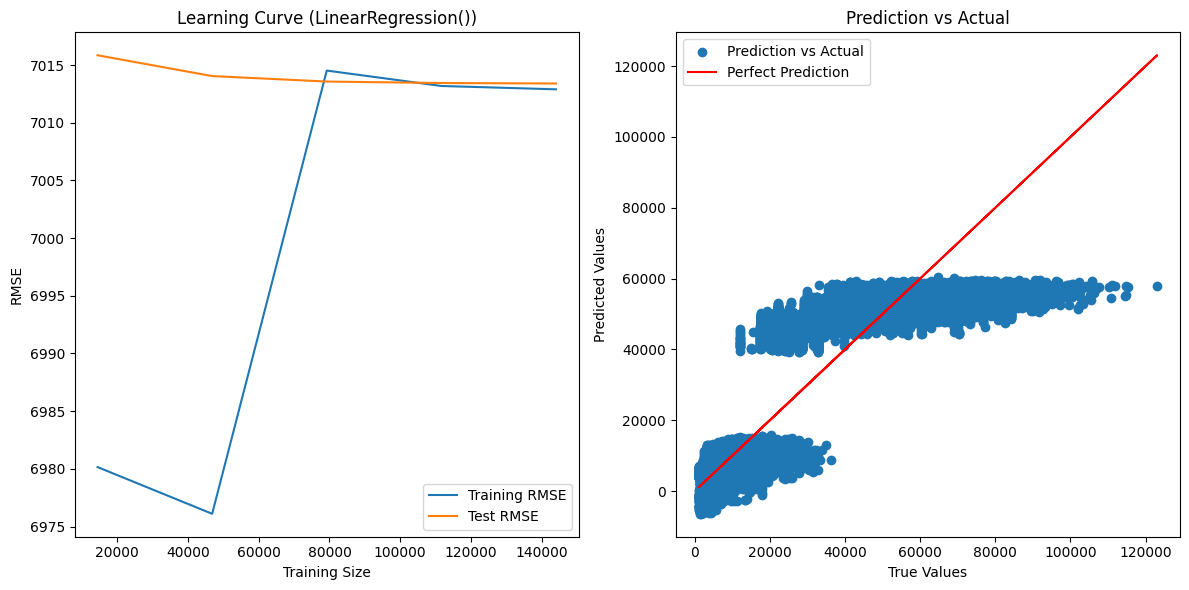

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# График обучения (Learning Curve) с использованием RMSE
train_sizes, train_scores, test_scores = learning_curve(
    lin_model, X_train, y_train, cv=5,
    scoring='neg_mean_squared_error'  # Используем отрицательную MSE
)

# Преобразуем MSE в RMSE
train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

# Ось 1 (learning curve)
ax[0].plot(train_sizes, train_rmse, label="Training RMSE")
ax[0].plot(train_sizes, test_rmse, label="Test RMSE")
ax[0].set_title(f"Learning Curve ({lin_model})")
ax[0].set_xlabel('Training Size')
ax[0].set_ylabel('RMSE')
ax[0].legend()

# Ось 2 (scatter plot)
ax[1].scatter(y_test, y_pred, label="Prediction vs Actual")
ax[1].plot(y_test, y_test, c='r', label="Perfect Prediction")
ax[1].set_title('Prediction vs Actual')
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predicted Values')
ax[1].legend()

# Показать графики
plt.tight_layout()
plt.show()

## 5.3 Итог baseline

In [ ]:
answer_baseline

,Model,MSE,MAE,R2,RMSE,MAPE,Max Error,Median Absolute Error,fit_time
0,Среднее_значение,5.158205e+08,19783.880712,-7.249170e-08,22711.682233,2.385209,102179,16391.000000,0.000644
1,LinearRegression,4.907435e+07,4633.135491,9.048616e-01,7005.308491,0.437406,65098.313719,2990.236275,0.109382


**Линейная регрессия не справляется с задачей.**

Кривая обучения показывает высокую ошибку (RMSE) и на обучении, и на тесте (~7015), что говорит о недообучении (высокий bias). Больше данных не улучшают ситуацию.
График предсказаний демонстрирует, что модель систематически ошибается: сильно занижает дорогие варианты и часто завышает дешевые, не улавливая реальную зависимость цен.
Итог: `Линейная модель слишком проста для этих данных.`

# $6.$ Модели без оптимизации

In [138]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
import lightgbm as lgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


random_state = 42

models = {
    'ElasticNet Regression': ElasticNet(random_state=random_state),
    'XGBoost Regression': XGBRegressor(random_state=random_state, verbose = -1),
    'CatBoost Regression': CatBoostRegressor(random_state=random_state, verbose = 0),
    'LightGBM Regression': lgb.LGBMRegressor(random_state=random_state, verbose = -1),
}

In [139]:
answer_no_optuna = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE', 'MAPE', 'Max Error', 'Median Absolute Error', 'fit_time'])

In [140]:
for name, model in models.items():

    # Обучение всех остальных моделей
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    y_pred = model.predict(X_test)

    # Метрики
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)  # Корень из MSE
    mape = mean_absolute_percentage_error(y_test, y_pred)  # Средняя абсолютная процентная ошибка
    max_err = max_error(y_test, y_pred)  # Максимальная ошибка
    medae = median_absolute_error(y_test, y_pred)  # Медианная абсолютная ошибка

    answer_no_optuna_coss = pd.DataFrame({
        'Model': [name],
        'MSE': [mse],
        'MAE': [mae],
        'R2': [r2],
        'RMSE': [rmse],
        'MAPE': [mape],
        'Max Error': [max_err],
        'Median Absolute Error': [medae],
        'fit_time': [end_time - start_time]
    })
    print(answer_no_optuna_coss)
    answer_no_optuna = pd.concat([answer_no_optuna, answer_no_optuna_coss], ignore_index=True)
    print("-" * 80)

                   Model           MSE           MAE        R2          RMSE  \
0  ElasticNet Regression  2.515223e+08  12957.988251  0.512384  15859.453127   

       MAPE     Max Error  Median Absolute Error  fit_time  
0  1.377543  83568.653342           11288.892011  0.217406  
--------------------------------------------------------------------------------
                Model        MSE          MAE        R2         RMSE     MAPE  \
0  XGBoost Regression  9016918.0  1683.052002  0.982519  3002.818343  0.13525   

   Max Error  Median Absolute Error  fit_time  
0  45523.875             878.358154  0.382444  
--------------------------------------------------------------------------------
                 Model           MSE          MAE        R2         RMSE  \
0  CatBoost Regression  9.529257e+06  1723.828506  0.981526  3086.949387   

       MAPE     Max Error  Median Absolute Error  fit_time  
0  0.137567  44201.649373             888.939465  4.246523  
---------------------

# 6.1 Итоги моделей без оптимизации

In [141]:
answer = answer_no_optuna.sort_values(by=['RMSE', 'R2'])

pd.set_option('display.float_format', '{:.3f}'.format)
answer

,Model,MSE,MAE,R2,RMSE,MAPE,Max Error,Median Absolute Error,fit_time
1,XGBoost Regression,9016918.000,1683.052,0.983,3002.818,0.135,45523.875,878.358,0.382
2,CatBoost Regression,9529256.520,1723.829,0.982,3086.949,0.138,44201.649,888.939,4.247
3,LightGBM Regression,11570866.967,2000.885,0.978,3401.598,0.165,44370.221,1100.269,0.406
0,ElasticNet Regression,251522253.490,12957.988,0.512,15859.453,1.378,83568.653,11288.892,0.217


# $7.$ Модели с оптимизацией

In [ ]:
answer_with_optuna = pd.DataFrame()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

In [ ]:
import optuna
np.random.seed(42)
random_state = 42
from tqdm import tqdm
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

In [142]:
def color_scale(s):
    metrics_higher_is_better = ['R2']
    colors = ['background-color: lightgreen', 'background-color: yellow', 'background-color: orange', 'background-color: red']

    if s.name == 'Model':
        return [''] * len(s)

    if pd.api.types.is_numeric_dtype(s):
        if s.name in metrics_higher_is_better:
            ranks = s.rank(method='min', ascending=False).astype(int)
        else:
            ranks = s.rank(method='min', ascending=True).astype(int)

        return [colors[min(rank - 1, len(colors) - 1)] if pd.notna(val) else '' for val, rank in zip(s, ranks)]
    else:
        return [''] * len(s)

## 7.1 Grid search vs Random search vs Optuna на примере XGBoost Regression

### 7.1.1 Optuna

In [ ]:
def objective(trial):
    num_available_gpus =2
    gpu_id_for_trial = trial.number % num_available_gpus
    device_str = f'cuda:{gpu_id_for_trial}'
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),

        'random_state': random_state,
        'verbosity': 0,
        'objective': 'reg:squarederror',

        'device': device_str,

        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1.0),
    }


    model = XGBRegressor(**params)

    model.fit(X_train, y_train,
              early_stopping_rounds=50,
              eval_set=[(X_valid, y_valid)],
              verbose=False)

    y_pred = model.predict(X_valid)

    return np.sqrt(mean_squared_error(y_pred, y_valid))


study = optuna.create_study(direction='minimize', study_name='xgb_gpu_optimization')

pbar = tqdm(total=200, desc="Optimizing Hyperparameters")


def tqdm_callback(study, trial):
    pbar.update(1)


study.optimize(
    objective,
    n_trials=200,
    n_jobs=2,
    callbacks=[tqdm_callback]
)

pbar.close() # Close the progress bar


print("Лучшие гиперпараметры: ", study.best_params)
print("Лучшее значение RMSE: ", study.best_value)

[I 2025-05-18 12:11:02,604] A new study created in memory with name: xgb_gpu_optimization
Optimizing Hyperparameters:   7%|▋         | 14/200 [01:58<30:54,  9.97s/it][I 2025-05-18 12:13:00,737] Trial 13 finished with value: 3278.1874069051623 and parameters: {'n_estimators': 1808, 'max_depth': 9, 'learning_rate': 0.01997034965465738, 'subsample': 0.6960715010012394, 'colsample_bytree': 0.7778894958847239, 'gamma': 0.21937799570224448, 'lambda': 0.5181933104926189, 'alpha': 1.0072468093322384e-08, 'min_child_weight': 3, 'colsample_bylevel': 0.1063091396504357, 'colsample_bynode': 0.941234972580088}. Best is trial 9 with value: 2978.896847508229.
[I 2025-05-18 12:13:10,290] Trial 16 finished with value: 15432.562156090251 and parameters: {'n_estimators': 1270, 'max_depth': 8, 'learning_rate': 0.0007826181565091347, 'subsample': 0.8380705896580511, 'colsample_bytree': 0.5517006916012962, 'gamma': 0.12637612821599428, 'lambda': 0.0008701800185686389, 'alpha': 1.8502424775361066e-07, 'min_c

Лучшие гиперпараметры:  {'n_estimators': 1138, 'max_depth': 10, 'learning_rate': 0.048223076560384215, 'subsample': 0.9526744818368542, 'colsample_bytree': 0.9678606642049581, 'gamma': 0.038454040352562044, 'lambda': 5.216937011509722e-06, 'alpha': 5.0149290241414014e-06, 'min_child_weight': 1, 'colsample_bylevel': 0.8940873228683556, 'colsample_bynode': 0.6867250636979806}
Лучшее значение RMSE:  2275.89597966635


In [ ]:
print("Наилучшие гиперпараметры:", study.best_params)
print("Лучшая оценка:", study.best_value)

Наилучшие гиперпараметры: {'n_estimators': 1138, 'max_depth': 10, 'learning_rate': 0.048223076560384215, 'subsample': 0.9526744818368542, 'colsample_bytree': 0.9678606642049581, 'gamma': 0.038454040352562044, 'lambda': 5.216937011509722e-06, 'alpha': 5.0149290241414014e-06, 'min_child_weight': 1, 'colsample_bylevel': 0.8940873228683556, 'colsample_bynode': 0.6867250636979806}
Лучшая оценка: 2275.89597966635


### 7.1.2 grid search

In [ ]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit, ParameterGrid
import joblib
from sklearn.metrics import mean_squared_error

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"
N_GPUS_TO_USE = 2
np.random.seed(42)
random_state = 42

# Define parameter grid with more strategic values
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.03, 0.05],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9],
    'gamma': [0, 0.1],
    'reg_lambda': [1e-5, 1e-3, 1e-2],
    'reg_alpha': [1e-5, 1e-3, 1e-2]
}


# Initialize XGBoost estimator with correct parameter names
xgb_estimator = XGBRegressor(
    objective='reg:squarederror',
    device='cuda',
    random_state=random_state,
    verbosity=0,
    enable_categorical=False  # Explicitly disable categorical features processing
)

# Make sure X_train, X_valid are numpy arrays with numerical values only
# If your data is in pandas DataFrame, convert to numpy arrays
if hasattr(X_train, 'values'):
    print("Converting pandas DataFrames to numpy arrays...")
    X_train_array = X_train.values
    X_valid_array = X_valid.values
else:
    X_train_array = X_train
    X_valid_array = X_valid

# Combine train and validation sets for grid search
X_combined = np.concatenate((X_train_array, X_valid_array), axis=0)
y_combined = np.concatenate((y_train, y_valid), axis=0)

print(f"X_combined shape: {X_combined.shape}, y_combined shape: {y_combined.shape}")

# Define train-validation split for cross-validation
train_indices = np.full(X_train_array.shape[0], -1, dtype=int)
validation_indices = np.full(X_valid_array.shape[0], 0, dtype=int)
predefined_fold_indices = np.concatenate((train_indices, validation_indices))
cv_strategy = PredefinedSplit(test_fold=predefined_fold_indices)

# Fit parameters with early stopping
fit_params = {
    'early_stopping_rounds': 50,
    'eval_set': [(X_valid_array, y_valid)],
    'verbose': False
}

# Configure grid search
grid_search = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=cv_strategy,
    n_jobs=N_GPUS_TO_USE,
    verbose=1,  # Show progress
    refit=True,
    return_train_score=True,
    error_score='raise'  # This will give more detailed error messages
)

# Calculate total number of fits
num_combinations = len(list(ParameterGrid(param_grid)))
num_cv_splits = cv_strategy.get_n_splits()
total_fits = num_combinations * num_cv_splits

print(f"Starting GridSearchCV with {num_combinations} parameter combinations (total {total_fits} fits).")
print(f"Running up to {grid_search.n_jobs} jobs in parallel.")

# Run grid search
start_time = time.time()
print("Grid search started. This may take some time...")

grid_search.fit(X_combined, y_combined, **fit_params)
grid_search_successful = True

end_time = time.time()

print(f"\nGridSearchCV finished in {(end_time - start_time)/60:.2f} minutes.")

print("\nЛучшие гиперпараметры: ", grid_search.best_params_)
print("Лучшее значение RMSE (на валидационном наборе X_valid): ", -grid_search.best_score_)

Converting pandas DataFrames to numpy arrays...
X_combined shape: (180091, 10), y_combined shape: (180091,)
Starting GridSearchCV with 1944 parameter combinations (total 1944 fits).
Running up to 2 jobs in parallel.
Early stopping after 50 rounds without improvement.
Grid search started. This may take some time...
Fitting 1 folds for each of 1944 candidates, totalling 1944 fits

GridSearchCV finished in 187.38 minutes.

Лучшие гиперпараметры:  {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 1500, 'reg_alpha': 0.001, 'reg_lambda': 1e-05, 'subsample': 0.9}
Лучшее значение RMSE (на валидационном наборе X_valid):  2408.2747619842717


In [ ]:
print("\nЛучшие гиперпараметры: ", grid_search.best_params_)
print("Лучшее значение RMSE (на кросс-валидации): ", -grid_search.best_score_)


Лучшие гиперпараметры:  {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 1500, 'reg_alpha': 0.001, 'reg_lambda': 1e-05, 'subsample': 0.9}
Лучшее значение RMSE (на кросс-валидации):  2408.2747619842717


### 7.1.3 Random search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, PredefinedSplit
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import randint, uniform, loguniform

X_combined = pd.concat([X_train, X_valid], axis=0)
y_combined = np.concatenate((y_train, y_valid), axis=0)

test_fold = np.full(X_combined.shape[0], -1, dtype=int)
test_fold[len(X_train):] = 0 # Помечаем часть, соответствующую X_valid, как тестовую

ps = PredefinedSplit(test_fold)

xgb_model = XGBRegressor(
    early_stopping_rounds = 50,
    random_state=42,
    verbosity=0,
    objective='reg:squarederror',
    device='cuda',
    n_jobs=5,
)

param_distributions = {
    'n_estimators': randint(100, 3000 ),
    'max_depth': randint(3, 12),
    'learning_rate': loguniform(1e-5, 1),
    'subsample': uniform(loc=0.1, scale=1.0),
    'colsample_bytree': uniform(loc=0.1, scale=1.0),
    'gamma': uniform(loc=0, scale=0.5),
    'lambda': loguniform(1e-8, 1.0),
    'alpha': loguniform(1e-8, 1.0),
    'min_child_weight': randint(1, 11),
    'colsample_bylevel': uniform(loc=0.1, scale=1.0),
    'colsample_bynode': uniform(loc=0.1, scale=1.0)
}

n_iterations = 200

random_search_on_eval = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=n_iterations,
    scoring='neg_root_mean_squared_error',
    cv=ps,
    n_jobs=1,
    random_state=random_state,
    verbose=1
)

fit_params_for_search = {
    'eval_set': [(X_valid, y_valid)],
    'verbose': False
}

random_search_on_eval.fit(X_combined, y_combined, **fit_params_for_search)

best_rmse_eval_set = -random_search_on_eval.best_score_

print("Лучшие гиперпараметры (Best hyperparameters): ", random_search_on_eval.best_params_)
print(f"Лучшее значение RMSE на валидационном наборе (Best eval_set RMSE): {best_rmse_eval_set:.5f}")

Fitting 1 folds for each of 200 candidates, totalling 200 fits
Лучшие гиперпараметры (Best hyperparameters):  {'alpha': 0.6567400077804827, 'colsample_bylevel': 0.5069079607228706, 'colsample_bynode': 0.9707534503372591, 'colsample_bytree': 0.8823854840582734, 'gamma': 0.2835081304933339, 'lambda': 0.008083392629304438, 'learning_rate': 0.2469322459467559, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 1737, 'subsample': 0.5381723464119876}
Лучшее значение RMSE на валидационном наборе (Best eval_set RMSE): 2585.39527


In [ ]:
print("Лучшие гиперпараметры (Best hyperparameters): ", random_search_on_eval.best_params_)

Лучшие гиперпараметры (Best hyperparameters):  {'alpha': 0.6567400077804827, 'colsample_bylevel': 0.5069079607228706, 'colsample_bynode': 0.9707534503372591, 'colsample_bytree': 0.8823854840582734, 'gamma': 0.2835081304933339, 'lambda': 0.008083392629304438, 'learning_rate': 0.2469322459467559, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 1737, 'subsample': 0.5381723464119876}


## 7.2 Итоги сравнения

In [ ]:
params_optuna = {'n_estimators': 1138, 'max_depth': 10, 'learning_rate': 0.048223076560384215, 'subsample': 0.9526744818368542, 'colsample_bytree': 0.9678606642049581, 'gamma': 0.038454040352562044, 'lambda': 5.216937011509722e-06, 'alpha': 5.0149290241414014e-06, 'min_child_weight': 1, 'colsample_bylevel': 0.8940873228683556, 'colsample_bynode': 0.6867250636979806}
params_grid = {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 1500, 'reg_alpha': 0.001, 'reg_lambda': 1e-05, 'subsample': 0.9}
params_random = {'alpha': 0.6567400077804827, 'colsample_bylevel': 0.5069079607228706, 'colsample_bynode': 0.9707534503372591, 'colsample_bytree': 0.8823854840582734, 'gamma': 0.2835081304933339, 'lambda': 0.008083392629304438, 'learning_rate': 0.2469322459467559, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 1737, 'subsample': 0.5381723464119876}

In [ ]:
params_optuna2 = {'n_estimators': 1138, 'max_depth': 8, 'learning_rate': 0.048223076560384215, 'subsample': 0.9526744818368542, 'colsample_bytree': 0.9678606642049581, 'gamma': 0.038454040352562044, 'lambda': 5.216937011509722e-06, 'alpha': 5.0149290241414014e-06, 'min_child_weight': 1, 'colsample_bylevel': 0.8940873228683556, 'colsample_bynode': 0.6867250636979806}
params_grid2 = {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 1200, 'reg_alpha': 0.001, 'reg_lambda': 1e-05, 'subsample': 0.9}
params_random2 = {'alpha': 0.6567400077804827, 'colsample_bylevel': 0.5069079607228706, 'colsample_bynode': 0.9707534503372591, 'colsample_bytree': 0.8823854840582734, 'gamma': 0.2835081304933339, 'lambda': 0.008083392629304438, 'learning_rate': 0.2469322459467559, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 1000, 'subsample': 0.5381723464119876}

Plotting Learning Curves: 100%|███████████████████| 8/8 [07:48<00:00, 58.54s/it]


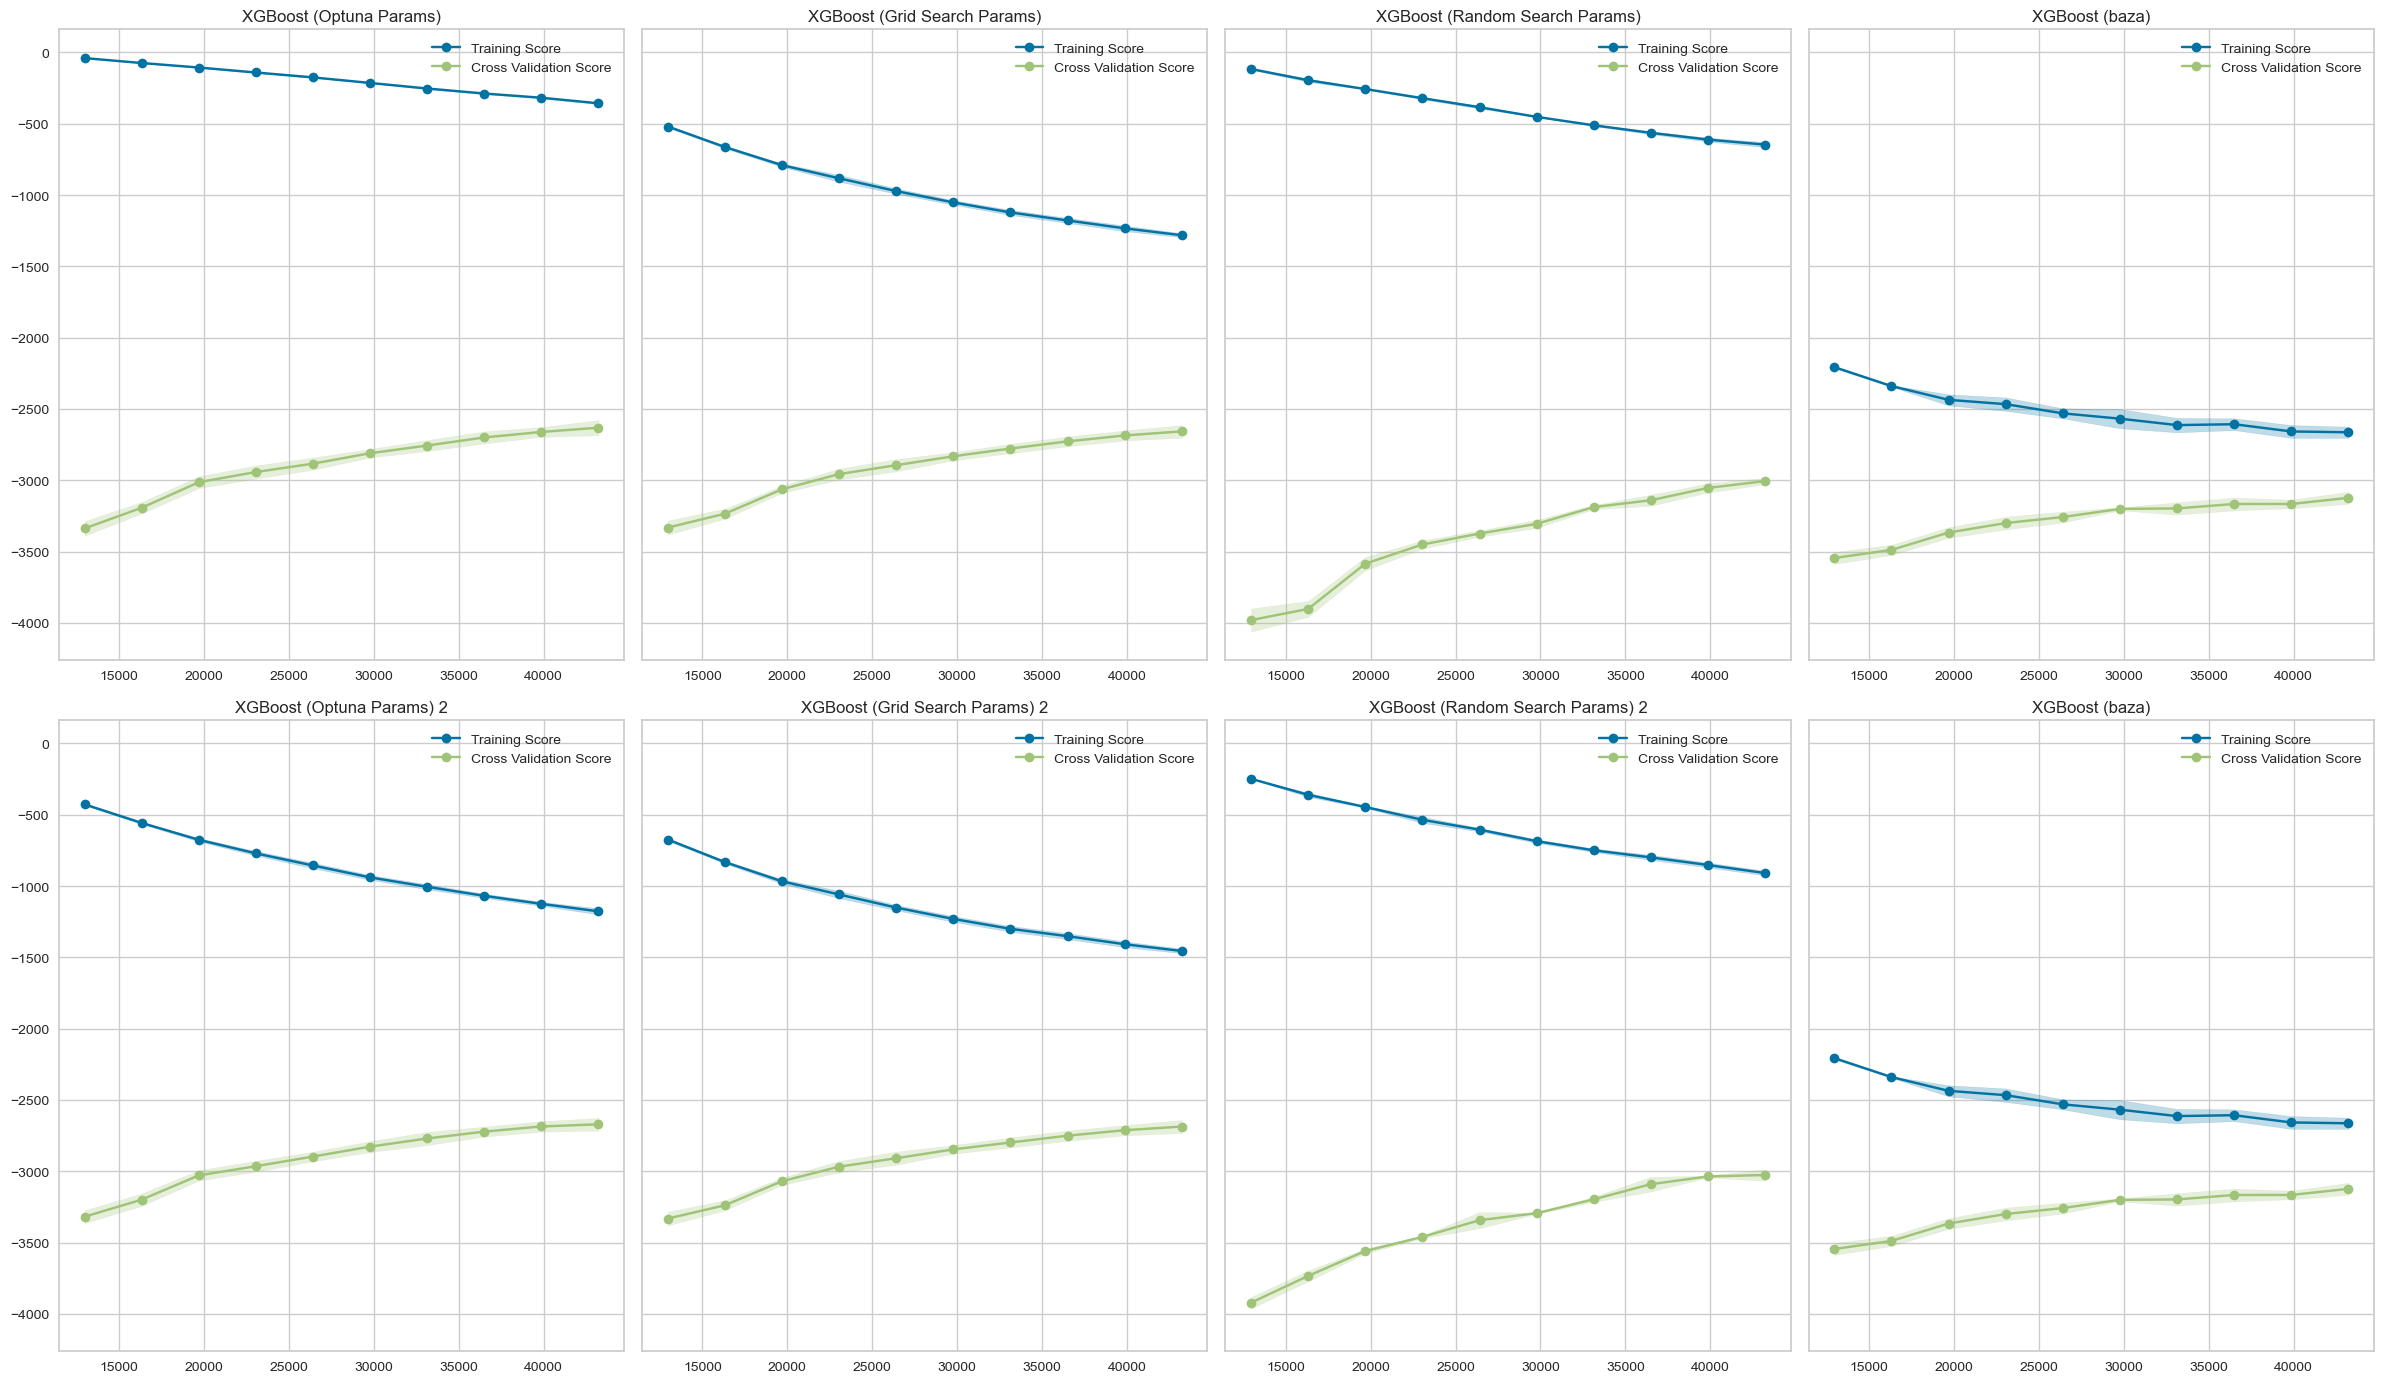

In [ ]:
from xgboost import XGBRegressor
from yellowbrick.model_selection import LearningCurve
from tqdm import tqdm

xgb_base_config = {
    'random_state': 42,
    'verbosity': 0,
    'objective': 'reg:squarederror',
    'n_jobs': 1
}

model_optuna = XGBRegressor(**xgb_base_config, **params_optuna)
model_grid = XGBRegressor(**xgb_base_config, **params_grid)
model_random = XGBRegressor(**xgb_base_config, **params_random)
model_baza = XGBRegressor(**xgb_base_config)

model_optuna2 = XGBRegressor(**xgb_base_config, **params_optuna2)
model_grid2 = XGBRegressor(**xgb_base_config, **params_grid2)
model_random2 = XGBRegressor(**xgb_base_config, **params_random2)


models_to_plot = [
    (model_optuna, "XGBoost (Optuna Params)"),
    (model_grid, "XGBoost (Grid Search Params)"),
    (model_random, "XGBoost (Random Search Params)"),
    (model_baza, "XGBoost (baza)"),
    (model_optuna2, "XGBoost (Optuna Params) 2"),
    (model_grid2, "XGBoost (Grid Search Params) 2"),
    (model_random2, "XGBoost (Random Search Params) 2"),
    (model_baza, "XGBoost (baza)")
]

train_sizes = np.linspace(0.3, 1.0, 10)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 14), sharey=True)
flat_axes = axes.flatten()
# Построение кривых обучения для каждой модели
for i, (model, title) in enumerate(tqdm(models_to_plot, desc="Plotting Learning Curves")):
    visualizer = LearningCurve(
        model,
        scoring='neg_root_mean_squared_error',
        train_sizes=train_sizes,
        cv=3,
        ax=flat_axes[i],
        random_state=42
    )

    visualizer.fit(X_train, y_train)
    flat_axes[i].set_title(title)
    flat_axes[i].legend()

plt.tight_layout()
plt.show()

Ситуация не катастрофическая, но есть явное переобучение (overfitting) на всех трех графиках.

`Проблема`: Модели слишком хорошо запоминают обучающие данные, но плохо обобщают результат на новых данных. Об этом говорит большой разрыв между линиями.

`Что хорошо`: Производительность на новых данных (зеленая линия) понемногу растет с увеличением объема данных.
Простое добавление данных может решить эту проблему.

`Основные выводы:`

Модели переобучены.
Производительность на реальных (новых) данных будет заметно хуже, чем на тех, на которых модель училась.

`Что делать:`

Работать с признаками: Отобрать более важные или создать новые, более информативные.
Больше разнообразных данных: Хотя текущие данные помогают, нужны более разнообразные примеры, либо нужно активнее бороться со сложностью модели.

In [ ]:
import time

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
    max_error,
    median_absolute_error,
)

models_to_evaluate = {
    "BAZA": {"model_params": {}, "model_obj": None},

    "Optuna": {"model_params": params_optuna, "model_obj": None},
    "GridSearch": {"model_params": params_grid, "model_obj": None},
    "RandomSearch": {"model_params": params_random, "model_obj": None},

    "Optuna2": {"model_params": params_optuna2, "model_obj": None},
    "GridSearch2": {"model_params": params_grid2, "model_obj": None},
    "RandomSearch2": {"model_params": params_random2, "model_obj": None}
}

results_list = []

for model_name, config in models_to_evaluate.items():
    print(f"Training and evaluating {model_name} model")

    current_params = {**xgb_base_config, **config["model_params"]}
    model = XGBRegressor(**current_params)
    config["model_obj"] = model

    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    max_err = max_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)

    result_entry = {
        'Model': f'XGBoost Regression ({model_name})',
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'RMSE': rmse,
        'MAPE': mape,
        'Max Error': max_err,
        'Median Absolute Error': medae,
        'fit_time': fit_time
    }
    results_list.append(result_entry)


results_df = pd.DataFrame(results_list)


Training and evaluating BAZA model
Training and evaluating Optuna model
Training and evaluating GridSearch model
Training and evaluating RandomSearch model
Training and evaluating Optuna2 model
Training and evaluating GridSearch2 model
Training and evaluating RandomSearch2 model


In [144]:
results_df = df.copy()

In [145]:
df = pd.DataFrame(results_df)
df.style.apply(color_scale, axis=0)

,Model,MSE,MAE,R2,RMSE,MAPE,Max Error,Median Absolute Error,fit_time
0,XGBoost Regression (BAZA),9565320.509460,1734.636535,0.981456,3092.785235,0.138249,50402.382612,897.816406,0.171683
1,XGBoost Regression (Optuna),6145022.467015,1196.348687,0.988087,2478.915583,0.094453,40321.097656,479.745117,3.694008
2,XGBoost Regression (GridSearch),6524831.773447,1344.425626,0.987351,2554.375026,0.110073,38468.523438,643.823364,2.458365
3,XGBoost Regression (RandomSearch),7754137.750426,1571.573338,0.984967,2784.625244,0.138299,43416.261719,833.458496,3.689723
4,XGBoost Regression (Optuna2),6607541.576914,1332.122538,0.987190,2570.513874,0.107319,38516.371094,620.772217,2.124398
5,XGBoost Regression (GridSearch2),6752585.646656,1379.955869,0.986909,2598.573772,0.112464,38406.843750,666.670166,1.940035
6,XGBoost Regression (RandomSearch2),7828271.313621,1575.695548,0.984824,2797.904808,0.136467,37392.898438,826.904297,2.121280


`Вывод по этому сравнению:`

Интересно, что модели "Серии 2" (Optuna2, GridSearch2, RandomSearch2), хотя и значительно превосходят базовую модель BAZA, в целом не показывают улучшения по сравнению с лучшей моделью из первого раунда настройки – XGBoost Regression (Optuna) (строка 1). Фактически, модель Optuna из первого раунда (строка 1) остается лидером по большинству ключевых метрик (RMSE, R2, MAE, MAPE, Median Absolute Error).

In [ ]:
answer_with_optuna = pd.concat([answer_with_optuna, answer_with_optuna_coss], ignore_index=True)

# $8.$ Оптимизация моделей с помощью Optuna

### 8.1 CatBoost Regression

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('iterations', 100, 3000), # Increased upper bound
        'depth': trial.suggest_int('depth', 2, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.3, log=True), # Wider log range
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 30.0, log=True), # Wider log range
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255), # Number of splits for numerical features
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100), # Minimum number of training samples in a leaf
        'one_hot_max_size': trial.suggest_int('one_hot_max_size', 1, 25), # Max size for one-hot encoding
        'leaf_estimation_method': trial.suggest_categorical('leaf_estimation_method', ['Newton', 'Gradient']),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0), # Sample rate of rows
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.4, 1.0), # Percentage of features to use at each split
        'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 1, 8), # Max number of features that can be combined
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
        'random_state': 42,
        'verbose': False
    }

    model = CatBoostRegressor(**params, cat_features=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'days_left'])

    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50, verbose=False)

    y_pred = model.predict(X_valid)

    return root_mean_squared_error(y_pred, y_valid)

study = optuna.create_study(direction='minimize', study_name='xgb_gpu_optimization')

pbar = tqdm(total=200, desc="Optimizing Hyperparameters")


def tqdm_callback(study, trial):
    pbar.update(1)


study.optimize(
    objective,
    n_trials=200,
    callbacks=[tqdm_callback]
)

pbar.close()

print("Лучшие гиперпараметры: ", study.best_params)
print("Лучшее значение RMSE: ", study.best_value)

[I 2025-05-27 14:18:03,872] A new study created in memory with name: xgb_gpu_optimization

Optimizing Hyperparameters:   0%|                       | 0/200 [25:16<?, ?it/s]
[I 2025-05-27 14:18:10,324] Trial 0 finished with value: 14403.463430484831 and parameters: {'iterations': 1331, 'depth': 2, 'learning_rate': 0.000411745256056232, 'l2_leaf_reg': 0.0031878738883005494, 'bagging_temperature': 0.4101111140555861, 'border_count': 165, 'min_data_in_leaf': 72, 'one_hot_max_size': 4, 'leaf_estimation_method': 'Gradient', 'subsample': 0.969991559348828, 'colsample_bylevel': 0.7723974018198424, 'max_ctr_complexity': 4, 'boosting_type': 'Ordered'}. Best is trial 0 with value: 14403.463430484831.

Optimizing Hyperparameters:   0%|               | 1/200 [00:06<21:23,  6.45s/it][I 2025-05-27 14:18:17,746] Trial 1 finished with value: 10948.664619316496 and parameters: {'iterations': 2450, 'depth': 3, 'learning_rate': 0.00036027595479605094, 'l2_leaf_reg': 6.80338155496155, 'bagging_temperature':

Лучшие гиперпараметры:  {'iterations': 2930, 'depth': 9, 'learning_rate': 0.1485565586610406, 'l2_leaf_reg': 1.0520888400241553, 'bagging_temperature': 0.28097729274807876, 'border_count': 248, 'min_data_in_leaf': 18, 'one_hot_max_size': 10, 'leaf_estimation_method': 'Gradient', 'subsample': 0.8946137329280692, 'colsample_bylevel': 0.9130414364730923, 'max_ctr_complexity': 7, 'boosting_type': 'Plain'}
Лучшее значение RMSE:  2583.5819740832385


In [ ]:
print("Наилучшие гиперпараметры:", study.best_params)
print("Лучшая оценка:", study.best_value)

Наилучшие гиперпараметры: {'iterations': 2930, 'depth': 9, 'learning_rate': 0.1485565586610406, 'l2_leaf_reg': 1.0520888400241553, 'bagging_temperature': 0.28097729274807876, 'border_count': 248, 'min_data_in_leaf': 18, 'one_hot_max_size': 10, 'leaf_estimation_method': 'Gradient', 'subsample': 0.8946137329280692, 'colsample_bylevel': 0.9130414364730923, 'max_ctr_complexity': 7, 'boosting_type': 'Plain'}
Лучшая оценка: 2583.5819740832385


In [ ]:
params = study.best_params
model = CatBoostRegressor(verbose = 0, **params, cat_features=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'days_left'])

start_time = time.time()
model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50, verbose=False)
end_time = time.time()

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Корень из MSE
mape = mean_absolute_percentage_error(y_test, y_pred)  # Средняя абсолютная процентная ошибка
max_err = max_error(y_test, y_pred)  # Максимальная ошибка
medae = median_absolute_error(y_test, y_pred)  # Медианная абсолютная ошибка

answer_with_optuna_coss = pd.DataFrame({
    'Model': 'CatBoost Regression',
    'MSE': [mse],
    'MAE': [mae],
    'R2': [r2],
    'RMSE': [rmse],
    'MAPE': [mape],
    'Max Error': [max_err],
    'Median Absolute Error': [medae],
    'fit_time': [end_time - start_time]
})

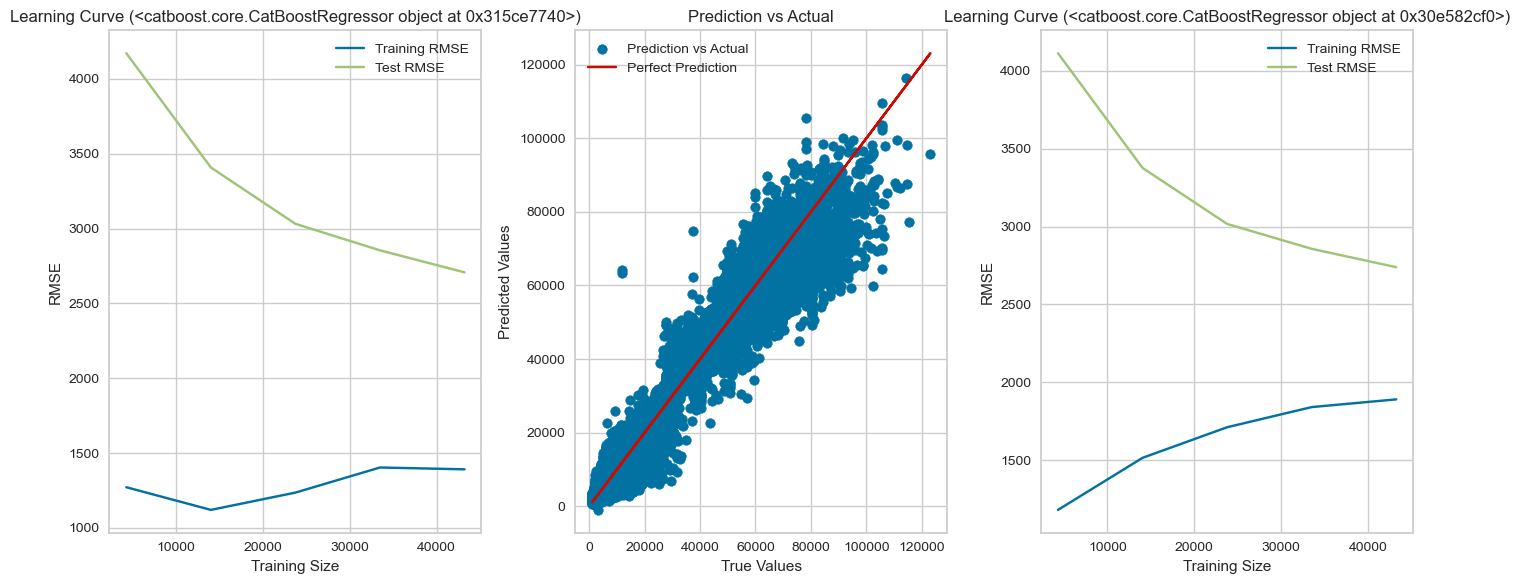

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
model = CatBoostRegressor(verbose=0, **params, cat_features=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'days_left'])

# График обучения (Learning Curve) с использованием RMSE
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=3,
    scoring='neg_root_mean_squared_error'
)

model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50, verbose=False)
y_pred = model.predict(X_test)
# Преобразуем MSE в RMSE
train_rmse = -train_scores.mean(axis=1)
test_rmse = -test_scores.mean(axis=1)

# Ось 1 (learning curve)
ax[0].plot(train_sizes, train_rmse, label="Training RMSE")
ax[0].plot(train_sizes, test_rmse, label="Test RMSE")
ax[0].set_title(f"Learning Curve ({model})")
ax[0].set_xlabel('Training Size')
ax[0].set_ylabel('RMSE')
ax[0].legend()

# Ось 2 (scatter plot)
ax[1].scatter(y_test, y_pred, label="Prediction vs Actual")
ax[1].plot(y_test, y_test, c='r', label="Perfect Prediction")
ax[1].set_title('Prediction vs Actual')
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predicted Values')
ax[1].legend()
params2 = {'iterations': 1500, 'depth': 8, 'learning_rate': 0.1485565586610406, 'l2_leaf_reg': 1.0520888400241553, 'bagging_temperature': 0.28097729274807876, 'border_count': 248, 'min_data_in_leaf': 18, 'one_hot_max_size': 10, 'leaf_estimation_method': 'Gradient', 'subsample': 0.8946137329280692, 'colsample_bylevel': 0.9130414364730923, 'max_ctr_complexity': 7, 'boosting_type': 'Plain'}
model2 = CatBoostRegressor(verbose=0, **params2, random_state=42, cat_features=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'days_left'])

# График обучения (Learning Curve) с использованием RMSE
train_sizes2, train_scores2, test_scores2 = learning_curve(
    model2, X_train, y_train, cv=3,
    scoring='neg_root_mean_squared_error'
)
# Преобразуем MSE в RMSE
train_rmse2 = -train_scores2.mean(axis=1)
test_rmse2 = -test_scores2.mean(axis=1)

# Ось 3 (learning curve)
ax[2].plot(train_sizes2, train_rmse2, label="Training RMSE")
ax[2].plot(train_sizes2, test_rmse2, label="Test RMSE")
ax[2].set_title(f"Learning Curve ({model2})")
ax[2].set_xlabel('Training Size')
ax[2].set_ylabel('RMSE')
ax[2].legend()


# Показать графики
plt.tight_layout()
plt.show()

In [ ]:
model = CatBoostRegressor(verbose=0, **params, cat_features=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'days_left'])
model2 = CatBoostRegressor(verbose=0, **params2, random_state=42, cat_features=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'days_left'])

start_time = time.time()
model.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50, verbose=False)
end_time = time.time()

y_pred_model1 = model.predict(X_test)

mse_model1 = mean_squared_error(y_test, y_pred_model1)
mae_model1 = mean_absolute_error(y_test, y_pred_model1)
r2_model1 = r2_score(y_test, y_pred_model1)
rmse_model1 = np.sqrt(mse_model1)
mape_model1 = mean_absolute_percentage_error(y_test, y_pred_model1)
max_err_model1 = max_error(y_test, y_pred_model1)
medae_model1 = median_absolute_error(y_test, y_pred_model1)
training_time_model1 = end_time - start_time

metrics_model1 = {'Model': 'Model 1 pere', 'MSE': mse_model1, 'MAE': mae_model1, 'R2': r2_model1, 'RMSE': rmse_model1, 'MAPE': mape_model1, 'Max Error': max_err_model1, 'MedianAE': medae_model1,'Training Time (s)': training_time_model1}

start_time = time.time()
model2.fit(X_train, y_train, eval_set=(X_valid, y_valid), early_stopping_rounds=50, verbose=False)
end_time = time.time()

y_pred_model2 = model2.predict(X_test)

mse_model2 = mean_squared_error(y_test, y_pred_model2)
mae_model2 = mean_absolute_error(y_test, y_pred_model2)
r2_model2 = r2_score(y_test, y_pred_model2)
rmse_model2 = np.sqrt(mse_model2)
mape_model2 = mean_absolute_percentage_error(y_test, y_pred_model2)
max_err_model2 = max_error(y_test, y_pred_model2)
medae_model2 = median_absolute_error(y_test, y_pred_model2)
training_time_model2 = end_time - start_time

metrics_model2 = {'Model': 'Model 2', 'MSE': mse_model2,'MAE': mae_model2,'R2': r2_model2,'RMSE': rmse_model2,'MAPE': mape_model2,'Max Error': max_err_model2,'MedianAE': medae_model2,'Training Time (s)': training_time_model2
}

In [ ]:
results_df = pd.DataFrame([metrics_model1, metrics_model2, data_model3_series])

In [147]:
df = pd.DataFrame(results_df)
df.style.apply(color_scale, axis=0)

,Model,MSE,MAE,R2,RMSE,MAPE,Max Error,MedianAE,Training Time (s)
0,Model 1 pere,6824929.872077,1306.998293,0.986769,2612.456674,0.104115,52325.970377,575.843509,22.666614
1,Model 2,7095994.780317,1394.212569,0.986243,2663.830847,0.114139,43365.273309,665.929808,10.879090
2,CatBoost Regression (Series),9529256.520000,1723.829000,0.982000,3086.949000,0.138000,44201.649000,888.939000,4.703000


Модель `CatBoost хорошо предсказывает в целом` (точки на правом графике близки к диагонали).

Основная проблема: переобучение. Модель слишком хорошо выучила обучающие данные, но на новых данных (тестовых) ошибка заметно выше. Это видно по большому разрыву между кривыми на левом графике.

Итог: Модель рабочая, но нужно бороться с переобучением, чтобы улучшить её точность на реальных задачах (целевая RMSE на тесте 2500).

In [ ]:
answer_with_optuna = pd.concat([answer_with_optuna, answer_with_optuna_coss], ignore_index=True)

### 8.2 LightGBM Regression

In [ ]:
X_train = pd.concat([X_train , X_valid] , axis = 0)
y_tarin = pd.concat([y_train , y_valid] , axis = 0)

In [55]:
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score
from tqdm import tqdm

N_FOLDS = 4

def objective(trial):
    params = {
        'n_jobs' : 2,
        'objective': 'regression',
        'metric': 'rmse', # Metric for internal evaluation (e.g., for early stopping)
        'verbosity': -1, 
        'random_state': 42,

        'n_estimators': trial.suggest_int('n_estimators', 200, 3000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.5, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 10, 700),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 250),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-5, 60.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 120.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 120.0, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
    }

    model = lgb.LGBMRegressor(**params)
    
    kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)

    scores = cross_val_score(model, X_train, y_train, cv=kf,  n_jobs=4,  scoring='neg_root_mean_squared_error',error_score=np.nan )

    if np.isnan(scores).any():
        return float('inf')

    mean_neg_rmse = np.mean(scores)

    return -mean_neg_rmse


study = optuna.create_study(
    direction='minimize', # We want to minimize RMSE
    study_name='lgb'
)

pbar = tqdm(total=200, desc=" Optimizing Hyperparameters")

def tqdm_callback(study, trial):
    pbar.update(1)


study.optimize(
    objective,
    n_trials=200,
    callbacks=[tqdm_callback]
)

pbar.close()

if study.best_trial:
    print(f"\nГотово! Лучший RMSE: {study.best_value:.5f}")
    print(f" Лучшие параметры: {study.best_params}")


[I 2025-05-27 21:18:47,870] A new study created in memory with name: lgb
A new study created in memory with name: lgb











 Optimizing Hyperparameters:   0%|                      | 0/200 [00:04<?, ?it/s]
[I 2025-05-27 21:19:01,045] Trial 0 finished with value: 9049.121157513555 and parameters: {'n_estimators': 2984, 'learning_rate': 0.0004925023293892786, 'num_leaves': 410, 'max_depth': 4, 'min_child_samples': 215, 'min_child_weight': 0.0012603049118322675, 'reg_alpha': 3.8111072435204513e-06, 'reg_lambda': 9.687666762542835e-09, 'colsample_bytree': 0.7455660810165143}. Best is trial 0 with value: 9049.121157513555.
Trial 0 finished with value: 9049.121157513555 and parameters: {'n_estimators': 2984, 'learning_rate': 0.0004925023293892786, 'num_leaves': 410, 'max_depth': 4, 'min_child_samples': 215, 'min_child_weight': 0.0012603049118322675, 'reg_alpha': 3.8111072435204513e-06, 'reg_lambda': 9.687666762542835e-09, 'colsample_bytree': 0.7455660810165143}. Best is trial 0 with valu


Готово! Лучший RMSE: 2061.86585
 Лучшие параметры: {'n_estimators': 2105, 'learning_rate': 0.07124055432078537, 'num_leaves': 323, 'max_depth': 15, 'min_child_samples': 2, 'min_child_weight': 3.732125851696892e-05, 'reg_alpha': 0.011106630456548394, 'reg_lambda': 4.520258044511815e-06, 'colsample_bytree': 0.7405014998729993}


In [56]:
print("Наилучшие гиперпараметры:", study.best_params)
print("Лучшая оценка (RMSE):", study.best_value)

Наилучшие гиперпараметры: {'n_estimators': 2105, 'learning_rate': 0.07124055432078537, 'num_leaves': 323, 'max_depth': 15, 'min_child_samples': 2, 'min_child_weight': 3.732125851696892e-05, 'reg_alpha': 0.011106630456548394, 'reg_lambda': 4.520258044511815e-06, 'colsample_bytree': 0.7405014998729993}
Лучшая оценка (RMSE): 2061.8658505707353


In [57]:
params = {'n_estimators': 2105, 'learning_rate': 0.07124055432078537, 'num_leaves': 323, 'max_depth': 15, 'min_child_samples': 2, 'min_child_weight': 3.732125851696892e-05, 'reg_alpha': 0.011106630456548394, 'reg_lambda': 4.520258044511815e-06, 'colsample_bytree': 0.7405014998729993}
params2 = {'n_estimators': 1500, 'learning_rate': 0.07124055432078537, 'num_leaves': 323, 'max_depth': 13, 'min_child_samples': 2, 'min_child_weight': 3.732125851696892e-05, 'reg_alpha': 0.011106630456548394, 'reg_lambda': 4.520258044511815e-06, 'colsample_bytree': 0.7405014998729993}

Фолд 1
Фолд 2
Фолд 3
Фолд 4


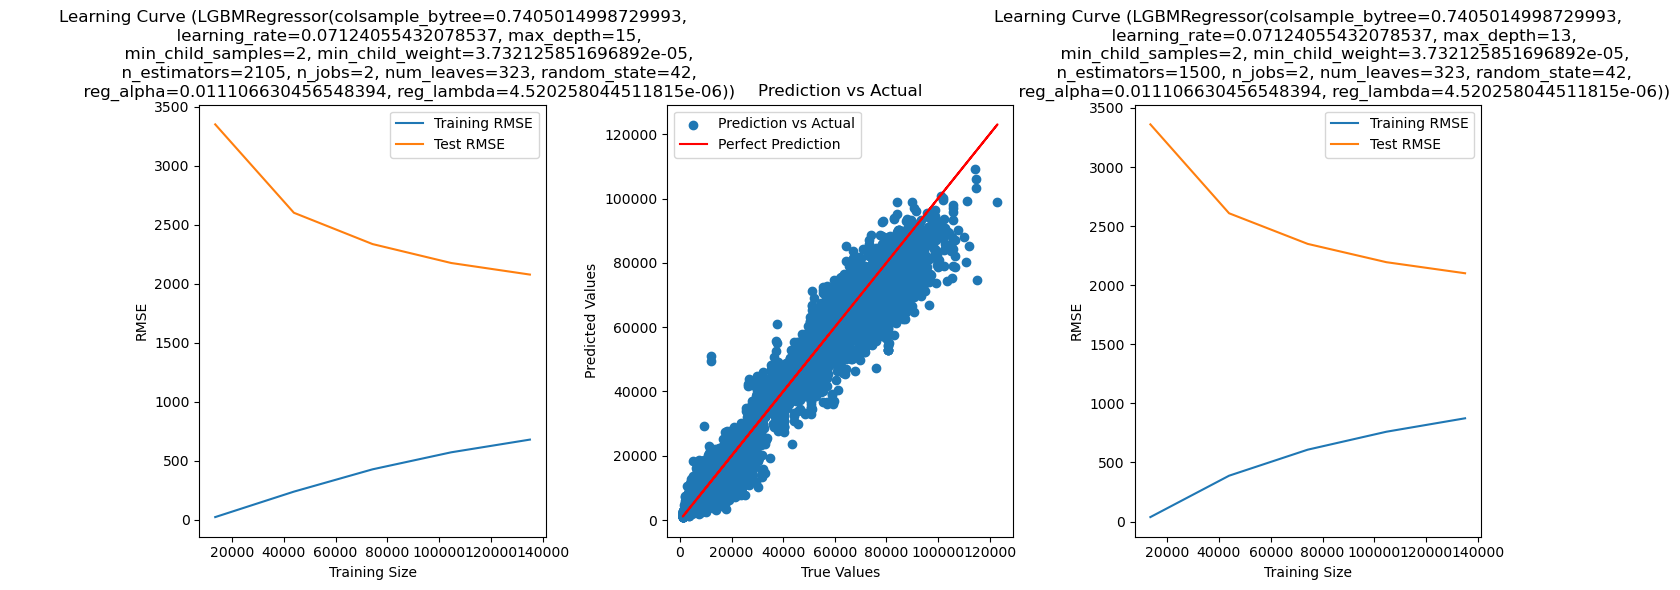

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
model = lgb.LGBMRegressor(**params, random_state = 42, n_jobs=2)

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=4, scoring='neg_root_mean_squared_error', n_jobs = 4)

oof_pred = np.zeros(len(y_test))
FOLDS = 4
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42) 
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Фолд {fold+1}")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    model = lgb.LGBMRegressor(**params, random_state = 42, n_jobs=2)
    model.fit(X_train_fold, y_train_fold)
    oof_pred+= model.predict(X_test)/FOLDS


y_pred = oof_pred.copy()

# Преобразуем MSE в RMSE
train_rmse = -train_scores.mean(axis=1)
test_rmse = -test_scores.mean(axis=1)

# Ось 1 (learning curve)
ax[0].plot(train_sizes, train_rmse, label="Training RMSE")
ax[0].plot(train_sizes, test_rmse, label="Test RMSE")
ax[0].set_title(f"Learning Curve ({model})")
ax[0].set_xlabel('Training Size')
ax[0].set_ylabel('RMSE')
ax[0].legend()

# Ось 2 (scatter plot)
ax[1].scatter(y_test, y_pred, label="Prediction vs Actual")
ax[1].plot(y_test, y_test, c='r', label="Perfect Prediction")
ax[1].set_title('Prediction vs Actual')
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predicted Values')
ax[1].legend()
model2 = lgb.LGBMRegressor(**params2, random_state = 42, n_jobs=2)

# График обучения (Learning Curve) с использованием RMSE
train_sizes2, train_scores2, test_scores2 = learning_curve(
    model2, X_train, y_train, cv=4,
    scoring='neg_root_mean_squared_error',
    n_jobs=4
)
# Преобразуем MSE в RMSE
train_rmse2 = -train_scores2.mean(axis=1)
test_rmse2 = -test_scores2.mean(axis=1)

# Ось 3 (learning curve)
ax[2].plot(train_sizes2, train_rmse2, label="Training RMSE")
ax[2].plot(train_sizes2, test_rmse2, label="Test RMSE")
ax[2].set_title(f"Learning Curve ({model2})")
ax[2].set_xlabel('Training Size')
ax[2].set_ylabel('RMSE')
ax[2].legend()


# Показать графики
plt.tight_layout()
plt.show()

In [75]:
params = study.best_params

kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42) 
oof_pred = np.zeros(len(y_test))
fit_time = 0
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Фолд {fold+1}")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    model = lgb.LGBMRegressor(**params, random_state = 42, verbosity = -1 )
    start_time = time.time()
    model.fit(X_train_fold, y_train_fold)
    end_time = time.time()
    oof_pred+= model.predict(X_test)/FOLDS
    
    fit_time += end_time - start_time

y_pred = oof_pred.copy()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Корень из MSE
mape = mean_absolute_percentage_error(y_test, y_pred)  # Средняя абсолютная процентная ошибка
max_err = max_error(y_test, y_pred)  # Максимальная ошибка
medae = median_absolute_error(y_test, y_pred)  # Медианная абсолютная ошибка

answer_with_optuna_coss = pd.DataFrame({
    'Model': 'LightGBM Regression',
    'MSE': [mse],
    'MAE': [mae],
    'R2': [r2],
    'RMSE': [rmse],
    'MAPE': [mape],
    'Max Error': [max_err],
    'Median Absolute Error': [medae],
    'fit_time': fit_time
})

Фолд 1
Фолд 2
Фолд 3
Фолд 4


In [81]:
params = params2.copy()

kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42) 
oof_pred = np.zeros(len(y_test))
fit_time = 0
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Фолд {fold+1}")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    model = lgb.LGBMRegressor(**params, random_state = 42, verbosity = -1 )
    start_time = time.time()
    model.fit(X_train_fold, y_train_fold)
    end_time = time.time()
    oof_pred+= model.predict(X_test)/FOLDS
    
    fit_time += end_time - start_time

y_pred = oof_pred.copy()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Корень из MSE
mape = mean_absolute_percentage_error(y_test, y_pred)  # Средняя абсолютная процентная ошибка
max_err = max_error(y_test, y_pred)  # Максимальная ошибка
medae = median_absolute_error(y_test, y_pred)  # Медианная абсолютная ошибка

answer_with_optuna_coss2 = pd.DataFrame({
    'Model': 'LightGBM Regression 2',
    'MSE': [mse],
    'MAE': [mae],
    'R2': [r2],
    'RMSE': [rmse],
    'MAPE': [mape],
    'Max Error': [max_err],
    'Median Absolute Error': [medae],
    'fit_time': fit_time
})

Фолд 1
Фолд 2
Фолд 3
Фолд 4


In [ ]:
answer_with_optuna = pd.concat([answer_with_optuna, answer_with_optuna_coss], ignore_index=True)

In [92]:
data_row1 = {'Model': 'LightGBM Regression BAZA','MSE': 11570866.967,'MAE': 2000.885, 'R2': 0.978,'RMSE': 3401.598,'MAPE': 0.165,'Max Error': 44370.221,'Median Absolute Error': 1100.269,'fit_time': 0.421 }

df = pd.DataFrame([data_row1, answer_with_optuna_coss, answer_with_optuna_coss2])

In [91]:

def color_scale(s):
    metrics_higher_is_better = ['R2']
    colors = ['background-color: lightgreen', 'background-color: yellow', 'background-color: orange', 'background-color: red']

    if s.name == 'Model':
        return [''] * len(s)

    if pd.api.types.is_numeric_dtype(s):
        if s.name in metrics_higher_is_better:
            ranks = s.rank(method='min', ascending=False).astype(int)
        else:
            ranks = s.rank(method='min', ascending=True).astype(int)

        return [colors[min(rank - 1, len(colors) - 1)] if pd.notna(val) else '' for val, rank in zip(s, ranks)]
    else:
        return [''] * len(s)


styled_df_scaled = df.style.apply(color_scale, axis=0)

styled_df_scaled

,Model,MSE,MAE,R2,RMSE,MAPE,Max Error,Median Absolute Error,fit_time
0,LightGBM Regression BAZA,11570866.967000,2000.885000,0.978000,3401.598000,0.165000,44370.221000,1100.269000,0.421000
1,LightGBM Regression,3883560.000000,913.837522,0.992471,1970.674970,0.075164,40403.980859,356.280410,207.069903
2,LightGBM Regression 2,4002928.000000,948.970344,0.992240,2000.731773,0.078991,39941.928420,388.323929,142.844431


Optuna для подбора гиперпараметров существенно улучшило качество модели LightGBM Regression.

`Сравнивая модель "LightGBM Regression BAZA" с "LightGBM Regression"` :

R2 вырос с 0.978000 до 0.992471.\
MAE (Mean Absolute Error) снизилась с 2000.885 до 913.837.\
**RMSE (Root Mean Squared Error) снизилась с 3401.598 до 1970.674.** \
MAPE (Mean Absolute Percentage Error) снизилась с 0.165000 до 0.075164.\

Эти изменения указывают на значительное повышение точности и обобщающей способности модели после использования кросс-валидации и Optuna.


### 8.4 ElasticNet Regression

In [93]:
from sklearn.linear_model import ElasticNet

In [96]:
from sklearn.model_selection import KFold, cross_val_score
from tqdm import tqdm

N_FOLDS = 5

def objective(trial):
    params = {
        'alpha': trial.suggest_float('alpha', 1e-5, 1000.0, log=True),
        'l1_ratio': trial.suggest_float('l1_ratio', 0.0, 1.0),
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),
        'selection': trial.suggest_categorical('selection', ['cyclic', 'random']),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'max_iter': trial.suggest_int('max_iter', 500, 5000),
        'positive': trial.suggest_categorical('positive', [True, False]),
        'precompute': trial.suggest_categorical('precompute', [True, False]),
    }

    model = ElasticNet(**params, random_state=42)
    
    kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)

    scores = cross_val_score(model, X_train, y_train, cv=kf,  n_jobs=4,  scoring='neg_root_mean_squared_error',error_score=np.nan )

    if np.isnan(scores).any():
        return float('inf')

    mean_neg_rmse = np.mean(scores)

    return -mean_neg_rmse


study = optuna.create_study(
    direction='minimize', # We want to minimize RMSE
    study_name='elastic'
)

pbar = tqdm(total=200, desc=" Optimizing Hyperparameters")

def tqdm_callback(study, trial):
    pbar.update(1)


study.optimize(
    objective,
    n_trials=200,
    callbacks=[tqdm_callback]
)

pbar.close()

if study.best_trial:
    print(f"\nГотово! Лучший RMSE: {study.best_value:.5f}")
    print(f" Лучшие параметры: {study.best_params}")


[I 2025-05-28 01:08:58,167] A new study created in memory with name: elastic
A new study created in memory with name: elastic
 Optimizing Hyperparameters:   0%|                      | 0/200 [00:00<?, ?it/s][I 2025-05-28 01:08:58,433] Trial 0 finished with value: 21008.763610233626 and parameters: {'alpha': 115.92366407961259, 'l1_ratio': 0.8756725807714109, 'tol': 8.464928972145102e-06, 'selection': 'cyclic', 'fit_intercept': True, 'max_iter': 4543, 'positive': False, 'precompute': False}. Best is trial 0 with value: 21008.763610233626.
Trial 0 finished with value: 21008.763610233626 and parameters: {'alpha': 115.92366407961259, 'l1_ratio': 0.8756725807714109, 'tol': 8.464928972145102e-06, 'selection': 'cyclic', 'fit_intercept': True, 'max_iter': 4543, 'positive': False, 'precompute': False}. Best is trial 0 with value: 21008.763610233626.
 Optimizing Hyperparameters:   0%|              | 1/200 [00:00<00:52,  3.79it/s][I 2025-05-28 01:08:58,735] Trial 1 finished with value: 17712.66147


Готово! Лучший RMSE: 7013.62816
 Лучшие параметры: {'alpha': 1.436741327975323e-05, 'l1_ratio': 0.7933860524200218, 'tol': 3.589387524827712e-06, 'selection': 'cyclic', 'fit_intercept': True, 'max_iter': 4610, 'positive': False, 'precompute': True}


In [97]:
print("Наилучшие гиперпараметры:", study.best_params)
print("Лучшая оценка (RMSE):", study.best_value)

Наилучшие гиперпараметры: {'alpha': 1.436741327975323e-05, 'l1_ratio': 0.7933860524200218, 'tol': 3.589387524827712e-06, 'selection': 'cyclic', 'fit_intercept': True, 'max_iter': 4610, 'positive': False, 'precompute': True}
Лучшая оценка (RMSE): 7013.628158746507


Фолд 1
Фолд 2
Фолд 3
Фолд 4
Фолд 5


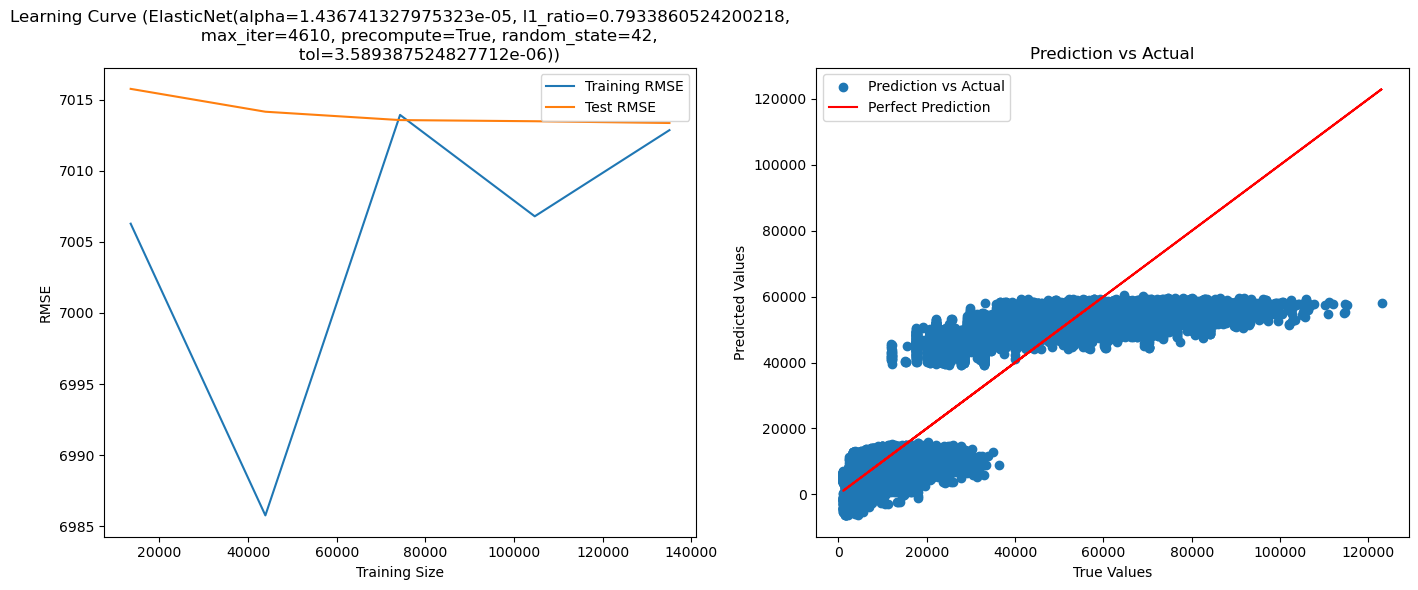

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
params = {'alpha': 1.436741327975323e-05, 'l1_ratio': 0.7933860524200218, 'tol': 3.589387524827712e-06, 'selection': 'cyclic', 'fit_intercept': True, 'max_iter': 4610, 'positive': False, 'precompute': True}
model = ElasticNet(**params, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=4, scoring='neg_root_mean_squared_error', n_jobs = 4)

oof_pred = np.zeros(len(y_test))
FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42) 
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Фолд {fold+1}")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    model = ElasticNet(**params, random_state=42)
    model.fit(X_train_fold, y_train_fold)
    oof_pred+= model.predict(X_test)/FOLDS


y_pred = oof_pred.copy()

# Преобразуем MSE в RMSE
train_rmse = -train_scores.mean(axis=1)
test_rmse = -test_scores.mean(axis=1)

# Ось 1 (learning curve)
ax[0].plot(train_sizes, train_rmse, label="Training RMSE")
ax[0].plot(train_sizes, test_rmse, label="Test RMSE")
ax[0].set_title(f"Learning Curve ({model})")
ax[0].set_xlabel('Training Size')
ax[0].set_ylabel('RMSE')
ax[0].legend()

# Ось 2 (scatter plot)
ax[1].scatter(y_test, y_pred, label="Prediction vs Actual")
ax[1].plot(y_test, y_test, c='r', label="Perfect Prediction")
ax[1].set_title('Prediction vs Actual')
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predicted Values')
ax[1].legend()

# Показать графики
plt.tight_layout()
plt.show()

In [103]:
params = study.best_params

kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42) 
oof_pred = np.zeros(len(y_test))
fit_time = 0
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"Фолд {fold+1}")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    model = ElasticNet(**params, random_state=42)
    start_time = time.time()
    model.fit(X_train_fold, y_train_fold)
    end_time = time.time()
    oof_pred+= model.predict(X_test)/FOLDS
    
    fit_time += end_time - start_time

y_pred = oof_pred.copy()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)  # Корень из MSE
mape = mean_absolute_percentage_error(y_test, y_pred)  # Средняя абсолютная процентная ошибка
max_err = max_error(y_test, y_pred)  # Максимальная ошибка
medae = median_absolute_error(y_test, y_pred)  # Медианная абсолютная ошибка

answer_with_optuna_coss = pd.DataFrame({
    'Model': 'ElasticNet Regression',
    'MSE': [mse],
    'MAE': [mae],
    'R2': [r2],
    'RMSE': [rmse],
    'MAPE': [mape],
    'Max Error': [max_err],
    'Median Absolute Error': [medae],
    'fit_time': [end_time - start_time]
})

Фолд 1
Фолд 2
Фолд 3
Фолд 4
Фолд 5


In [ ]:
answer_with_optuna = pd.concat([answer_with_optuna, answer_with_optuna_coss], ignore_index=True)

In [118]:
df_combined = pd.DataFrame([answer_with_optuna_coss.loc[0], answer_no_optuna.loc[0]], columns=columns_order)

In [137]:
df_combined.style.apply(color_scale, axis=0)

,Model,MSE,MAE,R2,RMSE,MAPE,Max Error,Median Absolute Error,fit_time
0,ElasticNet Regression 2,49074351.345415,4633.150971,0.904862,7005.308797,0.437408,65098.786113,2990.315469,0.005209
1,ElasticNet Regression,251522253.490000,12957.988000,0.512000,15859.453000,1.378000,83568.653000,11288.892000,0.027000


# $9.$ Вывод

In [149]:
data1 = [
    {'Model': 'ElasticNet Regression optuna', 'MSE': 49074351.345415, 'MAE': 4633.150971, 'R2': 0.904862, 'RMSE': 7005.308797, 'MAPE': 0.437408, 'Max Error': 65098.786113, 'Median Absolute Error': 2990.315469, 'fit_time': 0.005209},
]
df1 = pd.DataFrame(data1)

data2 = [
    {'Model': 'XGBoost Regression baseline', 'MSE': 9016918.000, 'MAE': 1683.052, 'R2': 0.983, 'RMSE': 3002.818, 'MAPE': 0.135, 'Max Error': 45523.875, 'Median Absolute Error': 878.358, 'fit_time': 0.382},
    {'Model': 'CatBoost Regression baseline', 'MSE': 9529256.520, 'MAE': 1723.829, 'R2': 0.982, 'RMSE': 3086.949, 'MAPE': 0.138, 'Max Error': 44201.649, 'Median Absolute Error': 888.939, 'fit_time': 4.247},
    {'Model': 'LightGBM Regression baseline', 'MSE': 11570866.967, 'MAE': 2000.885, 'R2': 0.978, 'RMSE': 3401.598, 'MAPE': 0.165, 'Max Error': 44370.221, 'Median Absolute Error': 1100.269, 'fit_time': 0.406},
    {'Model': 'ElasticNet Regression baseline', 'MSE': 251522253.490, 'MAE': 12957.988, 'R2': 0.512, 'RMSE': 15859.453, 'MAPE': 1.378, 'Max Error': 83568.653, 'Median Absolute Error': 11288.892, 'fit_time': 0.217}
]
df2 = pd.DataFrame(data2)

data3 = [
    {'Model': 'Среднее_значение', 'MSE': 5.158205e+08, 'MAE': 19783.880712, 'R2': -7.249170e-08, 'RMSE': 22711.682233, 'MAPE': 2.385209, 'Max Error': 102179, 'Median Absolute Error': 16391.000000, 'fit_time': 0.000644},
    {'Model': 'LinearRegression', 'MSE': 4.907435e+07, 'MAE': 4633.135491, 'R2': 9.048616e-01, 'RMSE': 7005.308491, 'MAPE': 0.437406, 'Max Error': 65098.313719, 'Median Absolute Error': 2990.236275, 'fit_time': 0.109382}
]
df3 = pd.DataFrame(data3)

data4 = [
    {'Model': 'XGBoost Regression (Optuna overfitted)', 'MSE': 6145022.467015, 'MAE': 1196.348687, 'R2': 0.988087, 'RMSE': 2478.915583, 'MAPE': 0.094453, 'Max Error': 40321.097656, 'Median Absolute Error': 479.745117, 'fit_time': 3.694008},
    {'Model': 'XGBoost Regression (GridSearch overfitted)', 'MSE': 6524831.773447, 'MAE': 1344.425626, 'R2': 0.987351, 'RMSE': 2554.375026, 'MAPE': 0.110073, 'Max Error': 38468.523438, 'Median Absolute Error': 643.823364, 'fit_time': 2.458365},
    {'Model': 'XGBoost Regression (RandomSearch overfitted)', 'MSE': 7754137.750426, 'MAE': 1571.573338, 'R2': 0.984967, 'RMSE': 2784.625244, 'MAPE': 0.138299, 'Max Error': 43416.261719, 'Median Absolute Error': 833.458496, 'fit_time': 3.689723},
    {'Model': 'XGBoost Regression (Optuna2)', 'MSE': 6607541.576914, 'MAE': 1332.122538, 'R2': 0.987190, 'RMSE': 2570.513874, 'MAPE': 0.107319, 'Max Error': 38516.371094, 'Median Absolute Error': 620.772217, 'fit_time': 2.124398},
    {'Model': 'XGBoost Regression (GridSearch2)', 'MSE': 6752585.646656, 'MAE': 1379.955869, 'R2': 0.986909, 'RMSE': 2598.573772, 'MAPE': 0.112464, 'Max Error': 38406.843750, 'Median Absolute Error': 666.670166, 'fit_time': 1.940035},
    {'Model': 'XGBoost Regression (RandomSearch2)', 'MSE': 7828271.313621, 'MAE': 1575.695548, 'R2': 0.984824, 'RMSE': 2797.904808, 'MAPE': 0.136467, 'Max Error': 37392.898438, 'Median Absolute Error': 826.904297, 'fit_time': 2.121280}
]

df4 = pd.DataFrame(data4)

data5 = [
    {'Model': 'CatBoost Regression (Optuna overfitted)', 'MSE': 6824929.872077, 'MAE': 1306.998293, 'R2': 0.986769, 'RMSE': 2612.456674, 'MAPE': 0.104115, 'Max Error': 52325.970377, 'Median Absolute Error': 575.843509, 'fit_time': 22.666614},
    {'Model': 'CatBoost Regression (Optuna2)', 'MSE': 7095994.780317, 'MAE': 1394.212569, 'R2': 0.986243, 'RMSE': 2663.830847, 'MAPE': 0.114139, 'Max Error': 43365.273309, 'Median Absolute Error': 665.929808, 'fit_time': 10.879090},
]
df5 = pd.DataFrame(data5)

data6 = [
    {'Model': 'LightGBM Regression (Optuna overfitted)', 'MSE': 3883560.000000, 'MAE': 913.837522, 'R2': 0.992471, 'RMSE': 1970.674970, 'MAPE': 0.075164, 'Max Error': 40403.980859, 'Median Absolute Error': 356.280410, 'fit_time': 207.069903},
    {'Model': 'LightGBM Regression (Optuna2)', 'MSE': 4002928.000000, 'MAE': 948.970344, 'R2': 0.992240, 'RMSE': 2000.731773, 'MAPE': 0.078991, 'Max Error': 39941.928420, 'Median Absolute Error': 388.323929, 'fit_time': 142.844431}
]
df6 = pd.DataFrame(data6)

combined_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)


In [184]:
combined_df.style.apply(color_scale, axis=0)

,Model,MSE,MAE,R2,RMSE,MAPE,Max Error,Median Absolute Error,fit_time
0,ElasticNet Regression optuna,49074351.345415,4633.150971,0.904862,7005.308797,0.437408,65098.786113,2990.315469,0.005209
1,XGBoost Regression baseline,9016918.000000,1683.052000,0.983000,3002.818000,0.135000,45523.875000,878.358000,0.382000
2,CatBoost Regression baseline,9529256.520000,1723.829000,0.982000,3086.949000,0.138000,44201.649000,888.939000,4.247000
3,LightGBM Regression baseline,11570866.967000,2000.885000,0.978000,3401.598000,0.165000,44370.221000,1100.269000,0.406000
4,ElasticNet Regression baseline,251522253.490000,12957.988000,0.512000,15859.453000,1.378000,83568.653000,11288.892000,0.217000
5,Среднее_значение,515820500.000000,19783.880712,-0.000000,22711.682233,2.385209,102179.000000,16391.000000,0.000644
6,LinearRegression,49074350.000000,4633.135491,0.904862,7005.308491,0.437406,65098.313719,2990.236275,0.109382
7,XGBoost Regression (Optuna overfitted),6145022.467015,1196.348687,0.988087,2478.915583,0.094453,40321.097656,479.745117,3.694008
8,XGBoost Regression (GridSearch overfitted),6524831.773447,1344.425626,0.987351,2554.375026,0.110073,38468.523438,643.823364,2.458365
9,XGBoost Regression (RandomSearch overfitted),7754137.750426,1571.573338,0.984967,2784.625244,0.138299,43416.261719,833.458496,3.689723


In [ ]:
combined_df

In [156]:
df_models = combined_df.copy()

# Convert relevant columns to numeric types
for col in ['MSE', 'MAE', 'R2', 'RMSE', 'MAPE', 'Max Error', 'Median Absolute Error', 'fit_time']:
    df_models[col] = pd.to_numeric(df_models[col], errors='coerce')

plt.style.use('seaborn-v0_8-whitegrid')

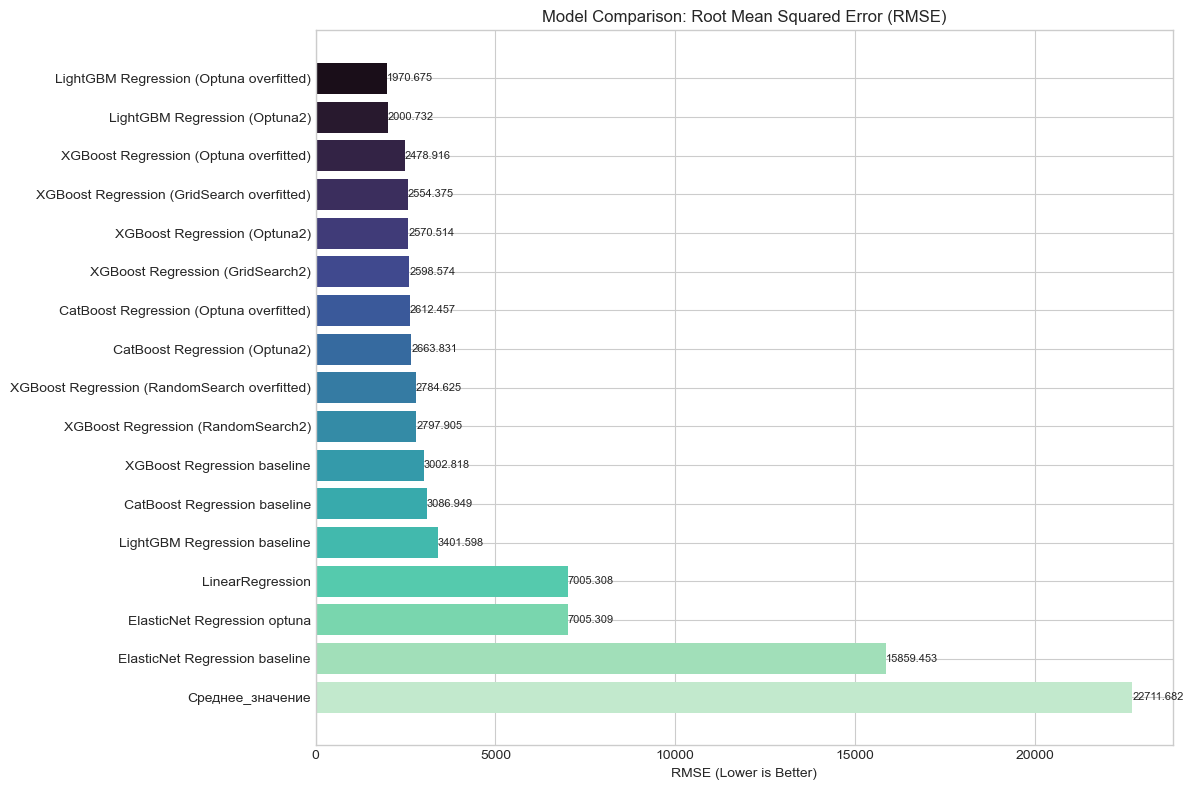

In [160]:

df_sorted = df_models.sort_values('RMSE', ascending=True)
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Model'], df_sorted['RMSE'], color=sns.color_palette("mako", len(df_sorted)))
plt.xlabel('RMSE (Lower is Better)')
plt.title('Model Comparison: Root Mean Squared Error (RMSE)')
plt.gca().invert_yaxis()
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.3f}',
             va='center', ha='left', fontsize=8)
plt.tight_layout()
plt.show()

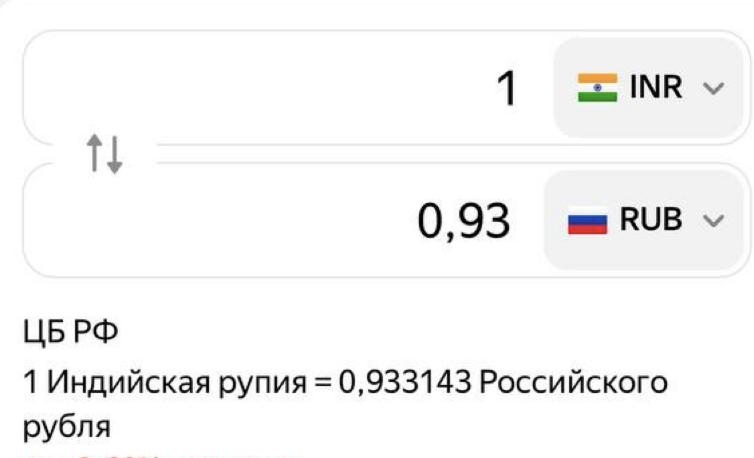

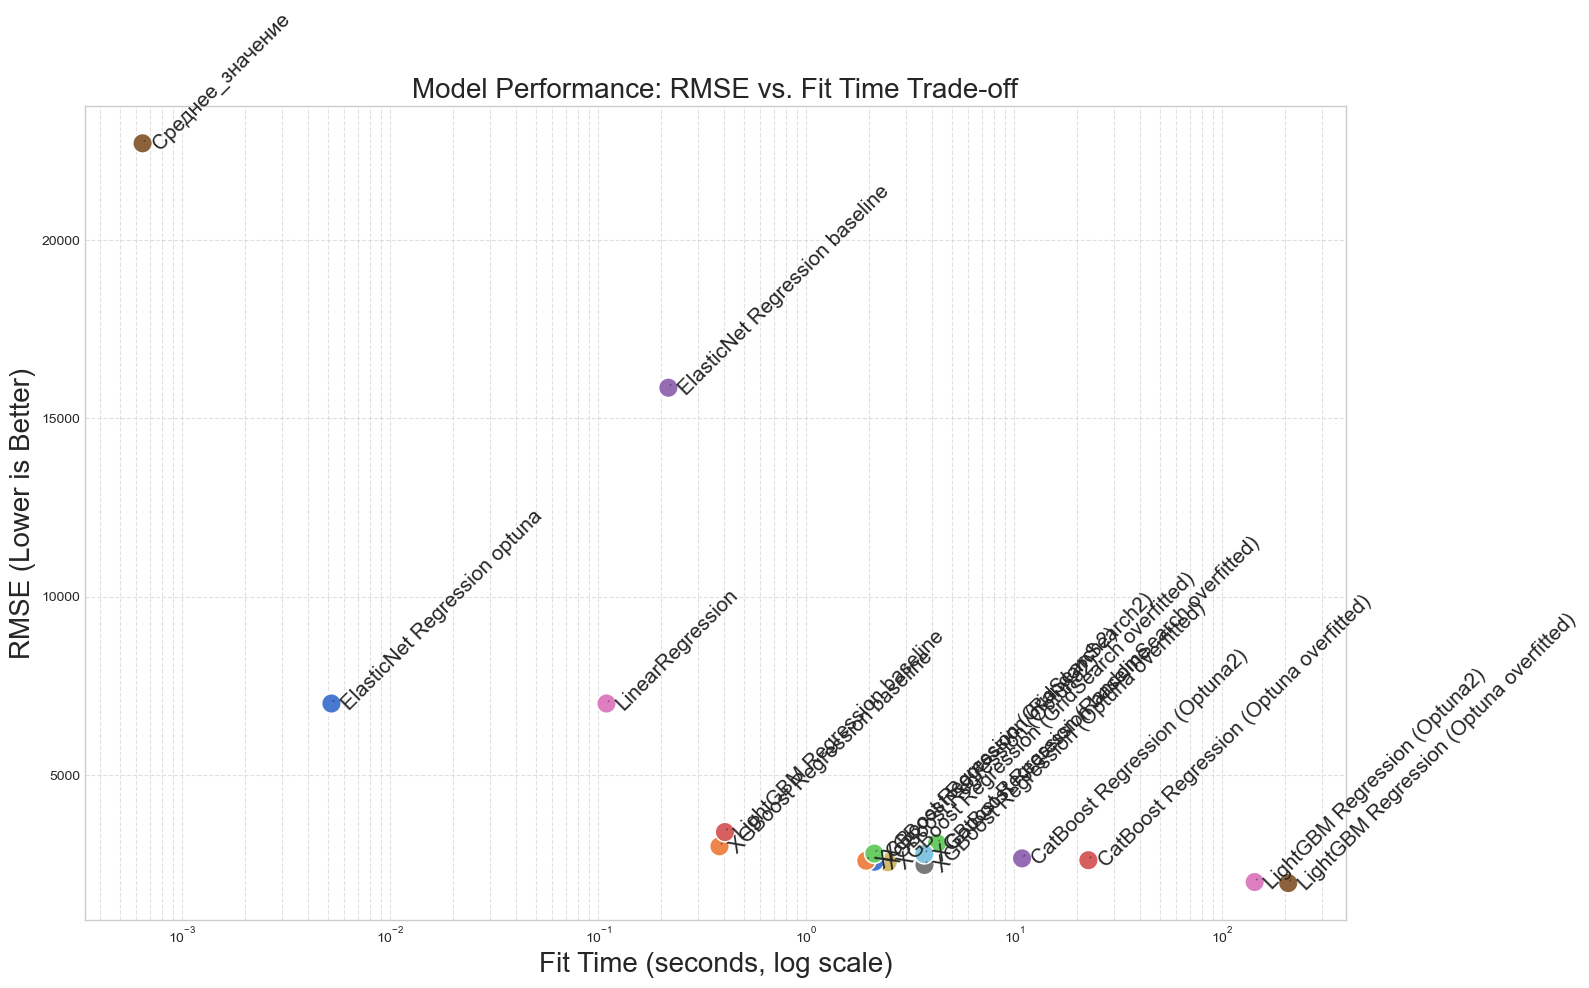

In [176]:
plt.figure(figsize=(16, 10))

# Increased fontsize for annotations
for i, model_name in enumerate(df_models['Model']):
    plt.annotate(model_name, (df_models['fit_time'].iloc[i], df_models['RMSE'].iloc[i]),
                 textcoords="offset points", xytext=(5, -5), ha='left', fontsize=15,
                 arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=0.1", alpha=0.4),
                 rotation=45)

# Increased size of scatterplot points (s)
sns.scatterplot(data=df_models, x='fit_time', y='RMSE', hue='Model', legend=False, s=200, palette="muted") # Changed s from 120 to 200
plt.xscale('log')
plt.xlabel('Fit Time (seconds, log scale)', fontsize=20)
plt.ylabel('RMSE (Lower is Better)', fontsize=20)
plt.title('Model Performance: RMSE vs. Fit Time Trade-off', fontsize=20)
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.tight_layout()
plt.show()

Этот график наглядно демонстрирует компромисс между точностью моделей машинного обучения (измеряемой по RMSE, где чем ниже, тем лучше) и временем, затрачиваемым на их обучение (Fit Time).

Ключевые выводы:

Простые модели (например, ElasticNet Regression, Linear Regression) обучаются очень быстро, но имеют значительно более высокую ошибку (RMSE) по сравнению с более сложными аналогами.

Продвинутые ансамблевые модели (XGBoost, CatBoost, LightGBM) показывают существенно лучшую точность (низкий RMSE).

Оптимизация гиперпараметров (например, с использованием Optuna) позволяет добиться еще более низкой ошибки для CatBoost и LightGBM, однако это часто сопряжено с увеличением времени обучения и риском переобучения.

Наилучший баланс между точностью и временем обучения, судя по графику, предлагают модели LightGBM и CatBoost, особенно их версии, оптимизированные с помощью Optuna (при условии контроля переобучения). Они достигают самых низких значений RMSE, хотя и требуют больше времени на подгонку по сравнению с базовыми версиями или XGBoost.

В целом, график подчеркивает, что для достижения максимальной точности часто приходится жертвовать временем обучения, и важно находить оптимальный баланс для конкретной задачи.